#Cleaning and segmentation


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train=pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/Датасет.xlsx')
test = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/Датасет.xlsx', sheet_name="Тестовая")

pd.options.display.max_columns=None

In [ ]:
train

,ИД,ВОЗРАСТ,ВОЗРАСТ.ЛЕТ,ПОЛ,СМЕНА_МЖ,ЗАГРАН,БРАК,ДЕТИ,ИЖДИВЕНЦЫ,ОБРАЗОВАНИЕ,ИНОСТР.ЯЗЫК,АВТО,ОТРАСЛЬ,РАБОТА_ПО_НАПР,РАБОТА_В_ОРГ,ДОЛЖНОСТЬ,ДОХОД_СЕМЬИ_,ДОХОД_НА_ОДНОГО_ЧЛЕНА_СЕМЬИ,ПЕРСОНАЛЬНЫЙ_ДОХОД,СУММА_ВЫДАННОГО_КРЕДИТА,ОТДЕЛЕНИЕ,ГОРОД,ЗАПРОШЕННАЯ_СУММА,СОБСТВЕННИК_ФАКТ.,ДОХОД_СУПРУГИ(А),КРЕДИТЫ_ПОГАШЕНЫ,ПЕРВЫЙ_КРЕДИТ,ДЕФОЛТ60
0,1,26.936986,27,1,0,0,2,0,0,2,4,3,35,2,3,5,20000,20000.0,20000,60000.0,27,10,60000,5,0,0,0,0
1,3,31.742466,32,2,0,0,1,2,2,2,4,3,11,3,3,6,22000,5500.0,10000,50000.0,29,12,50000,4,12000,0,1,0
2,4,23.172603,23,1,0,0,1,1,1,2,3,3,32,1,1,3,15000,5000.0,15000,30000.0,39,1,30000,3,0,1,0,1
3,5,24.424658,24,1,0,0,2,0,0,2,4,3,14,1,1,5,20000,20000.0,20000,70000.0,115,1,70000,3,0,0,0,1
4,6,28.654795,29,2,0,0,2,0,0,2,3,3,32,3,2,5,10000,10000.0,10000,15000.0,53,9,15000,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6005,6042,55.657534,56,2,0,0,1,2,0,2,4,0,1,1,2,5,30000,15000.0,15000,40000.0,36,1,40000,1,15000,0,1,1
6006,6043,26.906849,27,2,0,0,3,1,1,3,1,0,37,1,2,5,50000,12500.0,18000,50000.0,226,15,50000,5,0,1,0,0
6007,6044,41.958904,42,2,0,0,3,3,1,2,4,0,6,2,3,5,8500,4250.0,8500,10000.0,8,7,10000,5,0,0,0,0
6008,6045,24.567123,25,2,0,0,1,1,1,2,4,0,32,2,1,5,28000,9333.0,10000,70000.0,217,35,70000,3,18000,1,0,1


In [ ]:
test

,ИД,ВОЗРАСТ,ВОЗРАСТ.ЛЕТ,ПОЛ,СМЕНА_МЖ,ЗАГРАН,БРАК,ДЕТИ,ИЖДИВЕНЦЫ,ОБРАЗОВАНИЕ,ИНОСТР.ЯЗЫК,АВТО,ОТРАСЛЬ,РАБОТА_ПО_НАПР,РАБОТА_В_ОРГ,ДОЛЖНОСТЬ,ДОХОД_СЕМЬИ_,ДОХОД_НА_ОДНОГО_ЧЛЕНА_СЕМЬИ,ПЕРСОНАЛЬНЫЙ_ДОХОД,СУММА_ВЫДАННОГО_КРЕДИТА,ОТДЕЛЕНИЕ,ГОРОД,ЗАПРОШЕННАЯ_СУММА,СОБСТВЕННИК_ФАКТ.,ДОХОД_СУПРУГИ(А),КРЕДИТЫ_ПОГАШЕНЫ,ПЕРВЫЙ_КРЕДИТ,ДЕФОЛТ60 (Прогноз),Скоринговый балл
0,6047,34.942466,35,2,0,0,2,2,2,2,2,0,32,1,1,5,30000,7500.0,10000,20000,73,10,20000,5,20000,0,0,NaN,NaN
1,6048,34.476712,34,2,0,0,1,2,2,2,4,0,25,1,2,5,15000,3750.0,7000,15000,79,12,15000,2,8000,0,1,NaN,NaN
2,6049,35.843836,36,2,0,0,4,2,2,2,3,0,30,3,3,5,15000,5000.0,15000,30000,153,10,30000,1,0,1,0,NaN,NaN
3,6050,26.383562,26,2,0,0,1,1,1,3,4,0,32,1,1,5,32000,9300.0,14000,20000,115,1,20000,5,18000,0,1,NaN,NaN
4,6051,43.950685,44,2,0,0,3,3,3,2,4,0,14,3,3,5,34400,5733.0,12000,13000,227,27,13000,5,0,0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3033,10361,32.419178,32,1,0,0,1,2,2,2,4,0,21,3,3,5,20000,5000.0,15000,70000,226,15,70000,5,5000,0,1,NaN,NaN
3034,10362,23.136986,23,2,1,0,1,1,1,3,4,0,7,2,2,5,20000,6666.0,5000,6000,160,15,6000,3,13000,1,0,NaN,NaN
3035,10363,28.271233,28,2,0,0,1,2,2,2,3,0,7,3,3,5,13000,3250.0,10000,55000,182,27,55000,3,3000,0,1,NaN,NaN
3036,10364,46.375342,46,1,0,0,2,1,0,2,4,0,32,1,2,3,15000,15000.0,15000,70000,145,19,70000,1,0,0,1,NaN,NaN


In [ ]:
df_train=train.drop(columns=['ИД','ВОЗРАСТ.ЛЕТ'])
first_column = df_train.pop('ДЕФОЛТ60')
df_train.insert(0, 'ДЕФОЛТ60', first_column)

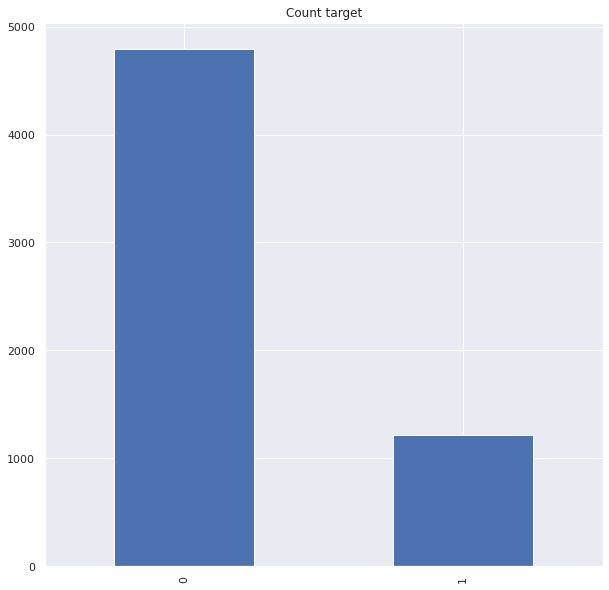

In [ ]:
df_train['ДЕФОЛТ60'].value_counts().plot(kind='bar', title='Count target');

In [ ]:
df_train.corr()
#Возможно стоит сбросить столбцы Брак, Авто, Должность, Собственник Факт : Корр<0.01. Это не будет выполнено, т.к. выборка очень маленькая
#Каким образом отделение влияет на дефолт? 

,ДЕФОЛТ60,ВОЗРАСТ,ПОЛ,СМЕНА_МЖ,ЗАГРАН,БРАК,ДЕТИ,ИЖДИВЕНЦЫ,ОБРАЗОВАНИЕ,ИНОСТР.ЯЗЫК,АВТО,ОТРАСЛЬ,РАБОТА_ПО_НАПР,РАБОТА_В_ОРГ,ДОЛЖНОСТЬ,ДОХОД_СЕМЬИ_,ДОХОД_НА_ОДНОГО_ЧЛЕНА_СЕМЬИ,ПЕРСОНАЛЬНЫЙ_ДОХОД,СУММА_ВЫДАННОГО_КРЕДИТА,ОТДЕЛЕНИЕ,ГОРОД,ЗАПРОШЕННАЯ_СУММА,СОБСТВЕННИК_ФАКТ.,ДОХОД_СУПРУГИ(А),КРЕДИТЫ_ПОГАШЕНЫ,ПЕРВЫЙ_КРЕДИТ
ДЕФОЛТ60,1.000000,-0.077614,-0.062841,0.029049,-0.014518,-0.001620,-0.011160,0.050934,-0.031679,-0.015295,-0.001079,0.005027,-0.048984,-0.062483,0.005907,-0.012010,-0.017769,0.014582,0.077302,0.115975,0.145759,0.082781,0.006145,-0.024032,-0.017465,0.039342
ВОЗРАСТ,-0.077614,1.000000,0.110675,-0.146157,-0.024053,0.082131,0.606744,-0.090293,-0.114439,0.245672,-0.007733,-0.086274,0.382742,0.282883,-0.021574,-0.002602,-0.031417,-0.053908,0.102546,0.021052,0.050071,0.099669,-0.179321,0.097987,-0.057964,0.078746
ПОЛ,-0.062841,0.110675,1.000000,-0.035165,-0.013553,0.189965,0.167359,0.037691,0.033842,0.002034,-0.020526,-0.078522,0.043738,0.069205,0.060116,-0.024075,-0.083523,-0.276053,-0.039146,-0.009927,-0.017387,-0.043793,-0.034573,0.125873,-0.016430,0.046024
СМЕНА_МЖ,0.029049,-0.146157,-0.035165,1.000000,-0.009658,-0.033143,-0.101898,-0.010261,0.084352,-0.120666,-0.014372,0.036240,-0.113923,-0.125651,-0.033884,0.037300,0.073189,0.086902,0.016395,0.001903,-0.008237,0.015667,0.068355,0.016817,-0.008816,-0.018603
ЗАГРАН,-0.014518,-0.024053,-0.013553,-0.009658,1.000000,0.014373,-0.017150,-0.000584,0.025814,-0.018724,-0.003257,-0.013927,-0.018540,-0.016150,-0.028696,0.006534,0.028235,0.047756,0.009597,-0.032423,-0.005598,0.006997,-0.008230,-0.014411,0.022771,-0.018973
БРАК,-0.001620,0.082131,0.189965,-0.033143,0.014373,1.000000,-0.065103,-0.206162,-0.011395,-0.017949,0.024434,0.009797,0.002316,-0.018179,0.018995,-0.362970,0.061253,-0.013684,-0.076635,-0.006540,-0.028072,-0.075594,-0.012214,-0.563390,0.011485,-0.024194
ДЕТИ,-0.011160,0.606744,0.167359,-0.101898,-0.017150,-0.065103,1.000000,0.450025,-0.149133,0.224382,-0.003528,-0.070546,0.266274,0.206902,0.011137,0.092946,-0.269939,-0.080733,0.095232,0.012519,0.051937,0.091638,-0.124688,0.216052,-0.044222,0.070082
ИЖДИВЕНЦЫ,0.050934,-0.090293,0.037691,-0.010261,-0.000584,-0.206162,0.450025,1.000000,-0.044218,0.082115,-0.012040,-0.019842,0.072020,0.048225,0.011152,0.155606,-0.424055,0.042910,0.038167,0.021020,0.050596,0.035742,-0.021845,0.213470,-0.005035,0.007582
ОБРАЗОВАНИЕ,-0.031679,-0.114439,0.033842,0.084352,0.025814,-0.011395,-0.149133,-0.044218,1.000000,-0.388921,-0.008466,-0.083689,-0.062341,-0.058632,-0.203539,0.158483,0.225881,0.222295,0.084050,0.020415,-0.001468,0.076992,-0.002311,0.054054,0.025030,-0.022572
ИНОСТР.ЯЗЫК,-0.015295,0.245672,0.002034,-0.120666,-0.018724,-0.017949,0.224382,0.082115,-0.388921,1.000000,0.009989,0.010064,0.142695,0.139033,0.113216,-0.096508,-0.194692,-0.174906,-0.032838,-0.010226,0.033718,-0.027151,-0.023948,0.035034,-0.010789,0.019067


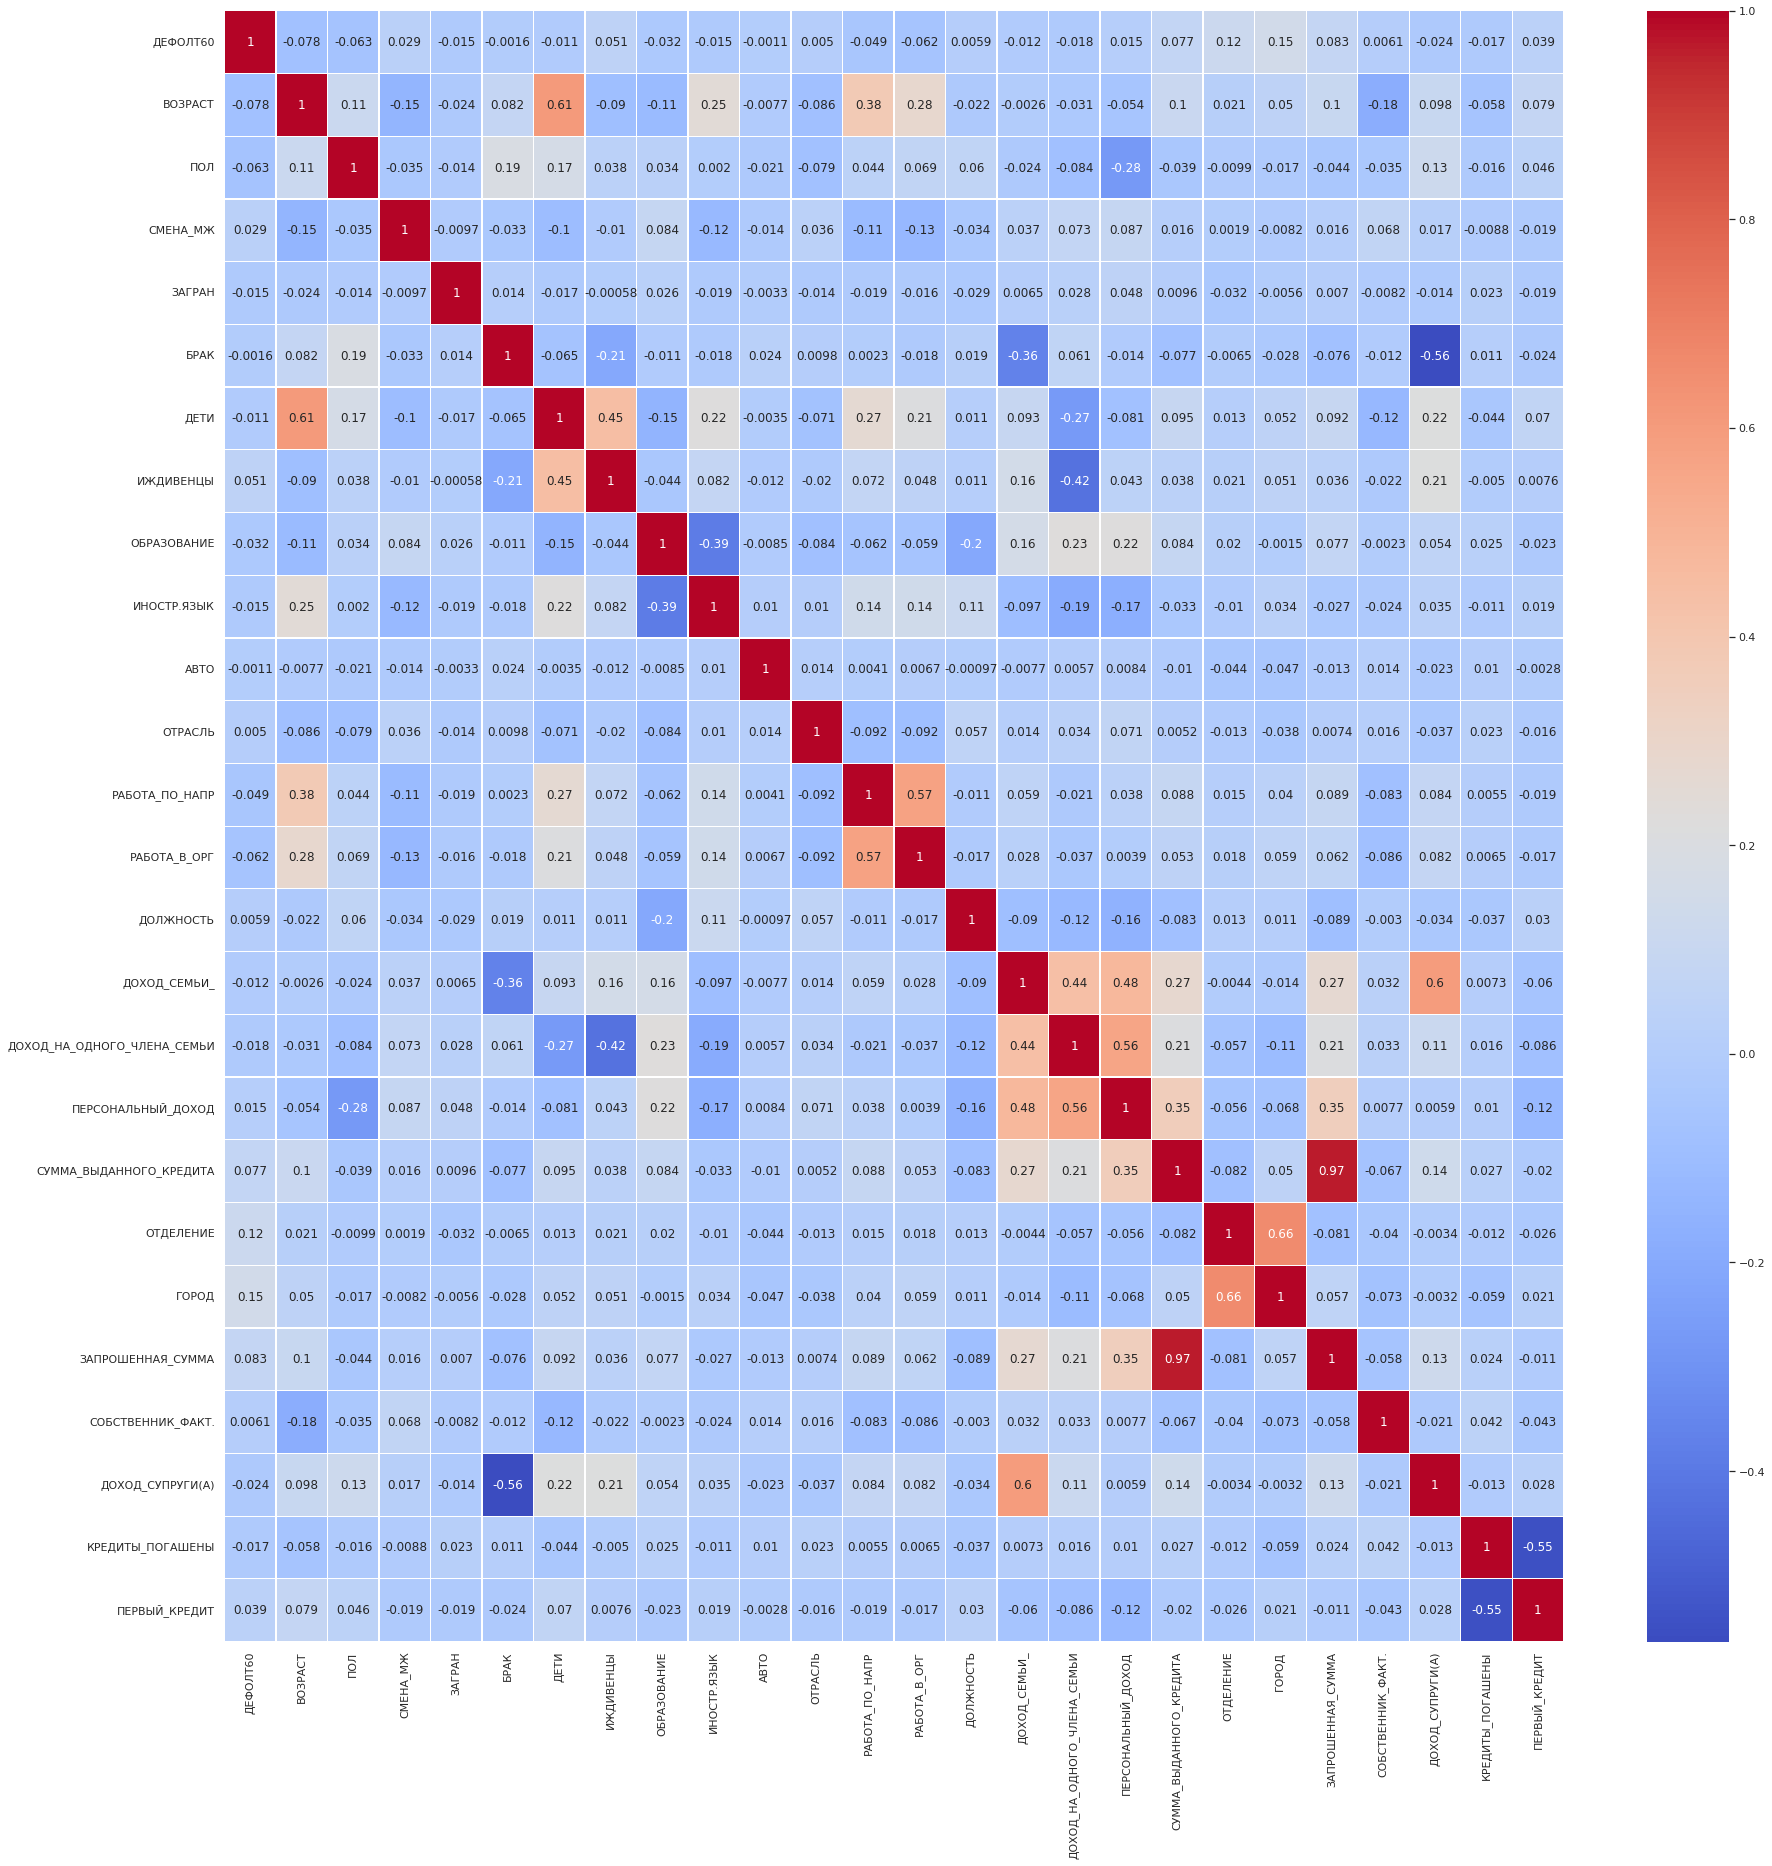

In [ ]:
plt.figure(figsize=(30,30))
sns.set(font_scale=1)
sns.heatmap(df_train.corr(),annot=True,cmap='coolwarm',linewidths=0.2)
plt.show()

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
target_columns =['ВОЗРАСТ','ДОХОД_СЕМЬИ_','ДОХОД_НА_ОДНОГО_ЧЛЕНА_СЕМЬИ','ПЕРСОНАЛЬНЫЙ_ДОХОД','СУММА_ВЫДАННОГО_КРЕДИТА','ЗАПРОШЕННАЯ_СУММА','ДОХОД_СУПРУГИ(А)']
temp = scaler.fit_transform(df_train[target_columns])
scaled_df = pd.DataFrame(temp, columns=target_columns)
scaled_df.head()

,ВОЗРАСТ,ДОХОД_СЕМЬИ_,ДОХОД_НА_ОДНОГО_ЧЛЕНА_СЕМЬИ,ПЕРСОНАЛЬНЫЙ_ДОХОД,СУММА_ВЫДАННОГО_КРЕДИТА,ЗАПРОШЕННАЯ_СУММА,ДОХОД_СУПРУГИ(А)
0,0.156033,0.086294,0.214286,0.629630,0.213034,0.578947,0.00
1,0.282621,0.096447,0.058929,0.259259,0.174300,0.473684,0.06
2,0.056871,0.060914,0.053572,0.444444,0.096834,0.263158,0.00
3,0.089853,0.086294,0.214286,0.629630,0.251767,0.684211,0.00
4,0.201285,0.035533,0.107143,0.259259,0.038733,0.105263,0.00


In [ ]:
for i in target_columns:
  df_train[i]=scaled_df[i]

df_train

,ДЕФОЛТ60,ВОЗРАСТ,ПОЛ,СМЕНА_МЖ,ЗАГРАН,БРАК,ДЕТИ,ИЖДИВЕНЦЫ,ОБРАЗОВАНИЕ,ИНОСТР.ЯЗЫК,АВТО,ОТРАСЛЬ,РАБОТА_ПО_НАПР,РАБОТА_В_ОРГ,ДОЛЖНОСТЬ,ДОХОД_СЕМЬИ_,ДОХОД_НА_ОДНОГО_ЧЛЕНА_СЕМЬИ,ПЕРСОНАЛЬНЫЙ_ДОХОД,СУММА_ВЫДАННОГО_КРЕДИТА,ОТДЕЛЕНИЕ,ГОРОД,ЗАПРОШЕННАЯ_СУММА,СОБСТВЕННИК_ФАКТ.,ДОХОД_СУПРУГИ(А),КРЕДИТЫ_ПОГАШЕНЫ,ПЕРВЫЙ_КРЕДИТ
0,0,0.156033,1,0,0,2,0,0,2,4,3,35,2,3,5,0.086294,0.214286,0.629630,0.213034,27,10,0.578947,5,0.000,0,0
1,0,0.282621,2,0,0,1,2,2,2,4,3,11,3,3,6,0.096447,0.058929,0.259259,0.174300,29,12,0.473684,4,0.060,0,1
2,1,0.056871,1,0,0,1,1,1,2,3,3,32,1,1,3,0.060914,0.053572,0.444444,0.096834,39,1,0.263158,3,0.000,1,0
3,1,0.089853,1,0,0,2,0,0,2,4,3,14,1,1,5,0.086294,0.214286,0.629630,0.251767,115,1,0.684211,3,0.000,0,0
4,0,0.201285,2,0,0,2,0,0,2,3,3,32,3,2,5,0.035533,0.107143,0.259259,0.038733,53,9,0.105263,1,0.000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6005,1,0.912601,2,0,0,1,2,0,2,4,0,1,1,2,5,0.137056,0.160715,0.444444,0.135567,36,1,0.368421,1,0.075,0,1
6006,0,0.155240,2,0,0,3,1,1,3,1,0,37,1,2,5,0.238579,0.133929,0.555556,0.174300,226,15,0.473684,5,0.000,1,0
6007,0,0.551747,2,0,0,3,3,1,2,4,0,6,2,3,5,0.027919,0.045536,0.203704,0.019367,8,7,0.052632,5,0.000,0,0
6008,1,0.093606,2,0,0,1,1,1,2,4,0,32,2,1,5,0.126904,0.099997,0.259259,0.251767,217,35,0.684211,3,0.090,1,0


Стоит сбросить загран- всего у 6 чеоловек значение 0 из двух датасетов

У всех категоричных параметров есть несбалансированные классы.

In [ ]:
target_columns =['БРАК','ДЕТИ','ИЖДИВЕНЦЫ','ОБРАЗОВАНИЕ','ИНОСТР.ЯЗЫК','АВТО','ОТРАСЛЬ',
                 'РАБОТА_ПО_НАПР','РАБОТА_В_ОРГ','ДОЛЖНОСТЬ','ОТДЕЛЕНИЕ','ГОРОД','СОБСТВЕННИК_ФАКТ.','СМЕНА_МЖ']


encoded_df=pd.get_dummies(df_train, columns=target_columns)
encoded_df    

,ДЕФОЛТ60,ВОЗРАСТ,ПОЛ,ЗАГРАН,ДОХОД_СЕМЬИ_,ДОХОД_НА_ОДНОГО_ЧЛЕНА_СЕМЬИ,ПЕРСОНАЛЬНЫЙ_ДОХОД,СУММА_ВЫДАННОГО_КРЕДИТА,ЗАПРОШЕННАЯ_СУММА,ДОХОД_СУПРУГИ(А),КРЕДИТЫ_ПОГАШЕНЫ,ПЕРВЫЙ_КРЕДИТ,БРАК_1,БРАК_2,БРАК_3,БРАК_4,ДЕТИ_0,ДЕТИ_1,ДЕТИ_2,ДЕТИ_3,ДЕТИ_4,ИЖДИВЕНЦЫ_0,ИЖДИВЕНЦЫ_1,ИЖДИВЕНЦЫ_2,ИЖДИВЕНЦЫ_3,ИЖДИВЕНЦЫ_4,ОБРАЗОВАНИЕ_1,ОБРАЗОВАНИЕ_2,ОБРАЗОВАНИЕ_3,ОБРАЗОВАНИЕ_4,ИНОСТР.ЯЗЫК_1,ИНОСТР.ЯЗЫК_2,ИНОСТР.ЯЗЫК_3,ИНОСТР.ЯЗЫК_4,АВТО_0,АВТО_1,АВТО_2,АВТО_3,ОТРАСЛЬ_1,ОТРАСЛЬ_2,ОТРАСЛЬ_3,ОТРАСЛЬ_4,ОТРАСЛЬ_5,ОТРАСЛЬ_6,ОТРАСЛЬ_7,ОТРАСЛЬ_8,ОТРАСЛЬ_9,ОТРАСЛЬ_10,ОТРАСЛЬ_11,ОТРАСЛЬ_12,ОТРАСЛЬ_13,ОТРАСЛЬ_14,ОТРАСЛЬ_15,ОТРАСЛЬ_16,ОТРАСЛЬ_17,ОТРАСЛЬ_18,ОТРАСЛЬ_19,ОТРАСЛЬ_20,ОТРАСЛЬ_21,ОТРАСЛЬ_22,ОТРАСЛЬ_23,ОТРАСЛЬ_24,ОТРАСЛЬ_25,ОТРАСЛЬ_26,ОТРАСЛЬ_27,ОТРАСЛЬ_28,ОТРАСЛЬ_29,ОТРАСЛЬ_30,ОТРАСЛЬ_31,ОТРАСЛЬ_32,ОТРАСЛЬ_33,ОТРАСЛЬ_34,ОТРАСЛЬ_35,ОТРАСЛЬ_36,ОТРАСЛЬ_37,ОТРАСЛЬ_38,ОТРАСЛЬ_39,ОТРАСЛЬ_40,ОТРАСЛЬ_41,ОТРАСЛЬ_42,РАБОТА_ПО_НАПР_1,РАБОТА_ПО_НАПР_2,РАБОТА_ПО_НАПР_3,РАБОТА_В_ОРГ_1,РАБОТА_В_ОРГ_2,РАБОТА_В_ОРГ_3,ДОЛЖНОСТЬ_1,ДОЛЖНОСТЬ_3,ДОЛЖНОСТЬ_4,ДОЛЖНОСТЬ_5,ДОЛЖНОСТЬ_6,ОТДЕЛЕНИЕ_3,ОТДЕЛЕНИЕ_7,ОТДЕЛЕНИЕ_8,ОТДЕЛЕНИЕ_10,ОТДЕЛЕНИЕ_11,ОТДЕЛЕНИЕ_14,ОТДЕЛЕНИЕ_16,ОТДЕЛЕНИЕ_17,ОТДЕЛЕНИЕ_18,ОТДЕЛЕНИЕ_24,ОТДЕЛЕНИЕ_25,ОТДЕЛЕНИЕ_27,ОТДЕЛЕНИЕ_28,ОТДЕЛЕНИЕ_29,ОТДЕЛЕНИЕ_30,ОТДЕЛЕНИЕ_31,ОТДЕЛЕНИЕ_33,ОТДЕЛЕНИЕ_36,ОТДЕЛЕНИЕ_37,ОТДЕЛЕНИЕ_38,ОТДЕЛЕНИЕ_39,ОТДЕЛЕНИЕ_41,ОТДЕЛЕНИЕ_50,ОТДЕЛЕНИЕ_51,ОТДЕЛЕНИЕ_52,ОТДЕЛЕНИЕ_53,ОТДЕЛЕНИЕ_54,ОТДЕЛЕНИЕ_55,ОТДЕЛЕНИЕ_56,ОТДЕЛЕНИЕ_57,ОТДЕЛЕНИЕ_58,ОТДЕЛЕНИЕ_59,ОТДЕЛЕНИЕ_60,ОТДЕЛЕНИЕ_64,ОТДЕЛЕНИЕ_65,ОТДЕЛЕНИЕ_66,ОТДЕЛЕНИЕ_70,ОТДЕЛЕНИЕ_73,ОТДЕЛЕНИЕ_78,ОТДЕЛЕНИЕ_79,ОТДЕЛЕНИЕ_80,ОТДЕЛЕНИЕ_83,ОТДЕЛЕНИЕ_84,ОТДЕЛЕНИЕ_85,ОТДЕЛЕНИЕ_90,ОТДЕЛЕНИЕ_96,ОТДЕЛЕНИЕ_98,ОТДЕЛЕНИЕ_103,ОТДЕЛЕНИЕ_104,ОТДЕЛЕНИЕ_107,ОТДЕЛЕНИЕ_108,ОТДЕЛЕНИЕ_110,ОТДЕЛЕНИЕ_114,ОТДЕЛЕНИЕ_115,ОТДЕЛЕНИЕ_116,ОТДЕЛЕНИЕ_117,ОТДЕЛЕНИЕ_119,ОТДЕЛЕНИЕ_120,ОТДЕЛЕНИЕ_121,ОТДЕЛЕНИЕ_122,ОТДЕЛЕНИЕ_125,ОТДЕЛЕНИЕ_126,ОТДЕЛЕНИЕ_127,ОТДЕЛЕНИЕ_135,ОТДЕЛЕНИЕ_136,ОТДЕЛЕНИЕ_137,ОТДЕЛЕНИЕ_138,ОТДЕЛЕНИЕ_140,ОТДЕЛЕНИЕ_143,ОТДЕЛЕНИЕ_144,ОТДЕЛЕНИЕ_145,ОТДЕЛЕНИЕ_146,ОТДЕЛЕНИЕ_148,ОТДЕЛЕНИЕ_149,ОТДЕЛЕНИЕ_153,ОТДЕЛЕНИЕ_154,ОТДЕЛЕНИЕ_155,ОТДЕЛЕНИЕ_156,ОТДЕЛЕНИЕ_157,ОТДЕЛЕНИЕ_159,ОТДЕЛЕНИЕ_160,ОТДЕЛЕНИЕ_161,ОТДЕЛЕНИЕ_162,ОТДЕЛЕНИЕ_163,ОТДЕЛЕНИЕ_164,ОТДЕЛЕНИЕ_165,ОТДЕЛЕНИЕ_166,ОТДЕЛЕНИЕ_167,ОТДЕЛЕНИЕ_168,ОТДЕЛЕНИЕ_169,ОТДЕЛЕНИЕ_170,ОТДЕЛЕНИЕ_171,ОТДЕЛЕНИЕ_177,ОТДЕЛЕНИЕ_178,ОТДЕЛЕНИЕ_179,ОТДЕЛЕНИЕ_181,ОТДЕЛЕНИЕ_182,ОТДЕЛЕНИЕ_184,ОТДЕЛЕНИЕ_185,ОТДЕЛЕНИЕ_186,ОТДЕЛЕНИЕ_187,ОТДЕЛЕНИЕ_188,ОТДЕЛЕНИЕ_189,ОТДЕЛЕНИЕ_190,ОТДЕЛЕНИЕ_191,ОТДЕЛЕНИЕ_192,ОТДЕЛЕНИЕ_193,ОТДЕЛЕНИЕ_194,ОТДЕЛЕНИЕ_195,ОТДЕЛЕНИЕ_196,ОТДЕЛЕНИЕ_199,ОТДЕЛЕНИЕ_200,ОТДЕЛЕНИЕ_201,ОТДЕЛЕНИЕ_202,ОТДЕЛЕНИЕ_203,ОТДЕЛЕНИЕ_204,ОТДЕЛЕНИЕ_205,ОТДЕЛЕНИЕ_206,ОТДЕЛЕНИЕ_208,ОТДЕЛЕНИЕ_210,ОТДЕЛЕНИЕ_211,ОТДЕЛЕНИЕ_212,ОТДЕЛЕНИЕ_213,ОТДЕЛЕНИЕ_214,ОТДЕЛЕНИЕ_216,ОТДЕЛЕНИЕ_217,ОТДЕЛЕНИЕ_218,ОТДЕЛЕНИЕ_219,ОТДЕЛЕНИЕ_220,ОТДЕЛЕНИЕ_223,ОТДЕЛЕНИЕ_224,ОТДЕЛЕНИЕ_225,ОТДЕЛЕНИЕ_226,ОТДЕЛЕНИЕ_227,ОТДЕЛЕНИЕ_228,ОТДЕЛЕНИЕ_229,ОТДЕЛЕНИЕ_230,ОТДЕЛЕНИЕ_231,ОТДЕЛЕНИЕ_232,ОТДЕЛЕНИЕ_240,ОТДЕЛЕНИЕ_241,ОТДЕЛЕНИЕ_243,ОТДЕЛЕНИЕ_247,ОТДЕЛЕНИЕ_248,ОТДЕЛЕНИЕ_249,ОТДЕЛЕНИЕ_257,ГОРОД_1,ГОРОД_2,ГОРОД_3,ГОРОД_4,ГОРОД_5,ГОРОД_6,ГОРОД_7,ГОРОД_8,ГОРОД_9,ГОРОД_10,ГОРОД_11,ГОРОД_12,ГОРОД_13,ГОРОД_14,ГОРОД_15,ГОРОД_16,ГОРОД_17,ГОРОД_18,ГОРОД_19,ГОРОД_20,ГОРОД_21,ГОРОД_22,ГОРОД_23,ГОРОД_24,ГОРОД_27,ГОРОД_29,ГОРОД_30,ГОРОД_31,ГОРОД_32,ГОРОД_33,ГОРОД_35,СОБСТВЕННИК_ФАКТ._0,СОБСТВЕННИК_ФАКТ._1,СОБСТВЕННИК_ФАКТ._2,СОБСТВЕННИК_ФАКТ._3,СОБСТВЕННИК_ФАКТ._4,СОБСТВЕННИК_ФАКТ._5,СОБСТВЕННИК_ФАКТ._6,СМЕНА_МЖ_0,СМЕНА_МЖ_1,СМЕНА_МЖ_2,СМЕНА_МЖ_3,СМЕНА_МЖ_4
0,0,0.156033,1,0,0.086294,0.214286,0.629630,0.213034,0.578947,0.000,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(encoded_df)
    distortions.append(kmeanModel.inertia_)

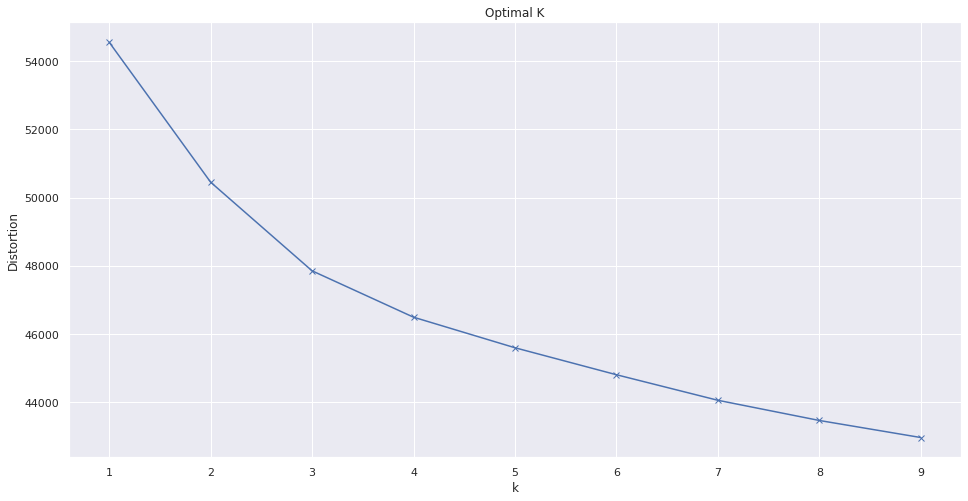

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Optimal K')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(encoded_df)
clusters=kmeanModel.labels_
#2 компоненты для визуализации
encoded_df

,ДЕФОЛТ60,ВОЗРАСТ,ПОЛ,ЗАГРАН,ДОХОД_СЕМЬИ_,ДОХОД_НА_ОДНОГО_ЧЛЕНА_СЕМЬИ,ПЕРСОНАЛЬНЫЙ_ДОХОД,СУММА_ВЫДАННОГО_КРЕДИТА,ЗАПРОШЕННАЯ_СУММА,ДОХОД_СУПРУГИ(А),КРЕДИТЫ_ПОГАШЕНЫ,ПЕРВЫЙ_КРЕДИТ,БРАК_1,БРАК_2,БРАК_3,БРАК_4,ДЕТИ_0,ДЕТИ_1,ДЕТИ_2,ДЕТИ_3,ДЕТИ_4,ИЖДИВЕНЦЫ_0,ИЖДИВЕНЦЫ_1,ИЖДИВЕНЦЫ_2,ИЖДИВЕНЦЫ_3,ИЖДИВЕНЦЫ_4,ОБРАЗОВАНИЕ_1,ОБРАЗОВАНИЕ_2,ОБРАЗОВАНИЕ_3,ОБРАЗОВАНИЕ_4,ИНОСТР.ЯЗЫК_1,ИНОСТР.ЯЗЫК_2,ИНОСТР.ЯЗЫК_3,ИНОСТР.ЯЗЫК_4,АВТО_0,АВТО_1,АВТО_2,АВТО_3,ОТРАСЛЬ_1,ОТРАСЛЬ_2,ОТРАСЛЬ_3,ОТРАСЛЬ_4,ОТРАСЛЬ_5,ОТРАСЛЬ_6,ОТРАСЛЬ_7,ОТРАСЛЬ_8,ОТРАСЛЬ_9,ОТРАСЛЬ_10,ОТРАСЛЬ_11,ОТРАСЛЬ_12,ОТРАСЛЬ_13,ОТРАСЛЬ_14,ОТРАСЛЬ_15,ОТРАСЛЬ_16,ОТРАСЛЬ_17,ОТРАСЛЬ_18,ОТРАСЛЬ_19,ОТРАСЛЬ_20,ОТРАСЛЬ_21,ОТРАСЛЬ_22,ОТРАСЛЬ_23,ОТРАСЛЬ_24,ОТРАСЛЬ_25,ОТРАСЛЬ_26,ОТРАСЛЬ_27,ОТРАСЛЬ_28,ОТРАСЛЬ_29,ОТРАСЛЬ_30,ОТРАСЛЬ_31,ОТРАСЛЬ_32,ОТРАСЛЬ_33,ОТРАСЛЬ_34,ОТРАСЛЬ_35,ОТРАСЛЬ_36,ОТРАСЛЬ_37,ОТРАСЛЬ_38,ОТРАСЛЬ_39,ОТРАСЛЬ_40,ОТРАСЛЬ_41,ОТРАСЛЬ_42,РАБОТА_ПО_НАПР_1,РАБОТА_ПО_НАПР_2,РАБОТА_ПО_НАПР_3,РАБОТА_В_ОРГ_1,РАБОТА_В_ОРГ_2,РАБОТА_В_ОРГ_3,ДОЛЖНОСТЬ_1,ДОЛЖНОСТЬ_3,ДОЛЖНОСТЬ_4,ДОЛЖНОСТЬ_5,ДОЛЖНОСТЬ_6,ОТДЕЛЕНИЕ_3,ОТДЕЛЕНИЕ_7,ОТДЕЛЕНИЕ_8,ОТДЕЛЕНИЕ_10,ОТДЕЛЕНИЕ_11,ОТДЕЛЕНИЕ_14,ОТДЕЛЕНИЕ_16,ОТДЕЛЕНИЕ_17,ОТДЕЛЕНИЕ_18,ОТДЕЛЕНИЕ_24,ОТДЕЛЕНИЕ_25,ОТДЕЛЕНИЕ_27,ОТДЕЛЕНИЕ_28,ОТДЕЛЕНИЕ_29,ОТДЕЛЕНИЕ_30,ОТДЕЛЕНИЕ_31,ОТДЕЛЕНИЕ_33,ОТДЕЛЕНИЕ_36,ОТДЕЛЕНИЕ_37,ОТДЕЛЕНИЕ_38,ОТДЕЛЕНИЕ_39,ОТДЕЛЕНИЕ_41,ОТДЕЛЕНИЕ_50,ОТДЕЛЕНИЕ_51,ОТДЕЛЕНИЕ_52,ОТДЕЛЕНИЕ_53,ОТДЕЛЕНИЕ_54,ОТДЕЛЕНИЕ_55,ОТДЕЛЕНИЕ_56,ОТДЕЛЕНИЕ_57,ОТДЕЛЕНИЕ_58,ОТДЕЛЕНИЕ_59,ОТДЕЛЕНИЕ_60,ОТДЕЛЕНИЕ_64,ОТДЕЛЕНИЕ_65,ОТДЕЛЕНИЕ_66,ОТДЕЛЕНИЕ_70,ОТДЕЛЕНИЕ_73,ОТДЕЛЕНИЕ_78,ОТДЕЛЕНИЕ_79,ОТДЕЛЕНИЕ_80,ОТДЕЛЕНИЕ_83,ОТДЕЛЕНИЕ_84,ОТДЕЛЕНИЕ_85,ОТДЕЛЕНИЕ_90,ОТДЕЛЕНИЕ_96,ОТДЕЛЕНИЕ_98,ОТДЕЛЕНИЕ_103,ОТДЕЛЕНИЕ_104,ОТДЕЛЕНИЕ_107,ОТДЕЛЕНИЕ_108,ОТДЕЛЕНИЕ_110,ОТДЕЛЕНИЕ_114,ОТДЕЛЕНИЕ_115,ОТДЕЛЕНИЕ_116,ОТДЕЛЕНИЕ_117,ОТДЕЛЕНИЕ_119,ОТДЕЛЕНИЕ_120,ОТДЕЛЕНИЕ_121,ОТДЕЛЕНИЕ_122,ОТДЕЛЕНИЕ_125,ОТДЕЛЕНИЕ_126,ОТДЕЛЕНИЕ_127,ОТДЕЛЕНИЕ_135,ОТДЕЛЕНИЕ_136,ОТДЕЛЕНИЕ_137,ОТДЕЛЕНИЕ_138,ОТДЕЛЕНИЕ_140,ОТДЕЛЕНИЕ_143,ОТДЕЛЕНИЕ_144,ОТДЕЛЕНИЕ_145,ОТДЕЛЕНИЕ_146,ОТДЕЛЕНИЕ_148,ОТДЕЛЕНИЕ_149,ОТДЕЛЕНИЕ_153,ОТДЕЛЕНИЕ_154,ОТДЕЛЕНИЕ_155,ОТДЕЛЕНИЕ_156,ОТДЕЛЕНИЕ_157,ОТДЕЛЕНИЕ_159,ОТДЕЛЕНИЕ_160,ОТДЕЛЕНИЕ_161,ОТДЕЛЕНИЕ_162,ОТДЕЛЕНИЕ_163,ОТДЕЛЕНИЕ_164,ОТДЕЛЕНИЕ_165,ОТДЕЛЕНИЕ_166,ОТДЕЛЕНИЕ_167,ОТДЕЛЕНИЕ_168,ОТДЕЛЕНИЕ_169,ОТДЕЛЕНИЕ_170,ОТДЕЛЕНИЕ_171,ОТДЕЛЕНИЕ_177,ОТДЕЛЕНИЕ_178,ОТДЕЛЕНИЕ_179,ОТДЕЛЕНИЕ_181,ОТДЕЛЕНИЕ_182,ОТДЕЛЕНИЕ_184,ОТДЕЛЕНИЕ_185,ОТДЕЛЕНИЕ_186,ОТДЕЛЕНИЕ_187,ОТДЕЛЕНИЕ_188,ОТДЕЛЕНИЕ_189,ОТДЕЛЕНИЕ_190,ОТДЕЛЕНИЕ_191,ОТДЕЛЕНИЕ_192,ОТДЕЛЕНИЕ_193,ОТДЕЛЕНИЕ_194,ОТДЕЛЕНИЕ_195,ОТДЕЛЕНИЕ_196,ОТДЕЛЕНИЕ_199,ОТДЕЛЕНИЕ_200,ОТДЕЛЕНИЕ_201,ОТДЕЛЕНИЕ_202,ОТДЕЛЕНИЕ_203,ОТДЕЛЕНИЕ_204,ОТДЕЛЕНИЕ_205,ОТДЕЛЕНИЕ_206,ОТДЕЛЕНИЕ_208,ОТДЕЛЕНИЕ_210,ОТДЕЛЕНИЕ_211,ОТДЕЛЕНИЕ_212,ОТДЕЛЕНИЕ_213,ОТДЕЛЕНИЕ_214,ОТДЕЛЕНИЕ_216,ОТДЕЛЕНИЕ_217,ОТДЕЛЕНИЕ_218,ОТДЕЛЕНИЕ_219,ОТДЕЛЕНИЕ_220,ОТДЕЛЕНИЕ_223,ОТДЕЛЕНИЕ_224,ОТДЕЛЕНИЕ_225,ОТДЕЛЕНИЕ_226,ОТДЕЛЕНИЕ_227,ОТДЕЛЕНИЕ_228,ОТДЕЛЕНИЕ_229,ОТДЕЛЕНИЕ_230,ОТДЕЛЕНИЕ_231,ОТДЕЛЕНИЕ_232,ОТДЕЛЕНИЕ_240,ОТДЕЛЕНИЕ_241,ОТДЕЛЕНИЕ_243,ОТДЕЛЕНИЕ_247,ОТДЕЛЕНИЕ_248,ОТДЕЛЕНИЕ_249,ОТДЕЛЕНИЕ_257,ГОРОД_1,ГОРОД_2,ГОРОД_3,ГОРОД_4,ГОРОД_5,ГОРОД_6,ГОРОД_7,ГОРОД_8,ГОРОД_9,ГОРОД_10,ГОРОД_11,ГОРОД_12,ГОРОД_13,ГОРОД_14,ГОРОД_15,ГОРОД_16,ГОРОД_17,ГОРОД_18,ГОРОД_19,ГОРОД_20,ГОРОД_21,ГОРОД_22,ГОРОД_23,ГОРОД_24,ГОРОД_27,ГОРОД_29,ГОРОД_30,ГОРОД_31,ГОРОД_32,ГОРОД_33,ГОРОД_35,СОБСТВЕННИК_ФАКТ._0,СОБСТВЕННИК_ФАКТ._1,СОБСТВЕННИК_ФАКТ._2,СОБСТВЕННИК_ФАКТ._3,СОБСТВЕННИК_ФАКТ._4,СОБСТВЕННИК_ФАКТ._5,СОБСТВЕННИК_ФАКТ._6,СМЕНА_МЖ_0,СМЕНА_МЖ_1,СМЕНА_МЖ_2,СМЕНА_МЖ_3,СМЕНА_МЖ_4
0,0,0.156033,1,0,0.086294,0.214286,0.629630,0.213034,0.578947,0.000,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
pca=PCA(n_components=2)
pca_vecs=pca.fit_transform(encoded_df)
x0=pca_vecs[:,0]
x1=pca_vecs[:,1]

In [ ]:
encoded_df['clusters']=clusters
encoded_df['x0']=x0
encoded_df['x1']=x1
#used only for visualisation 

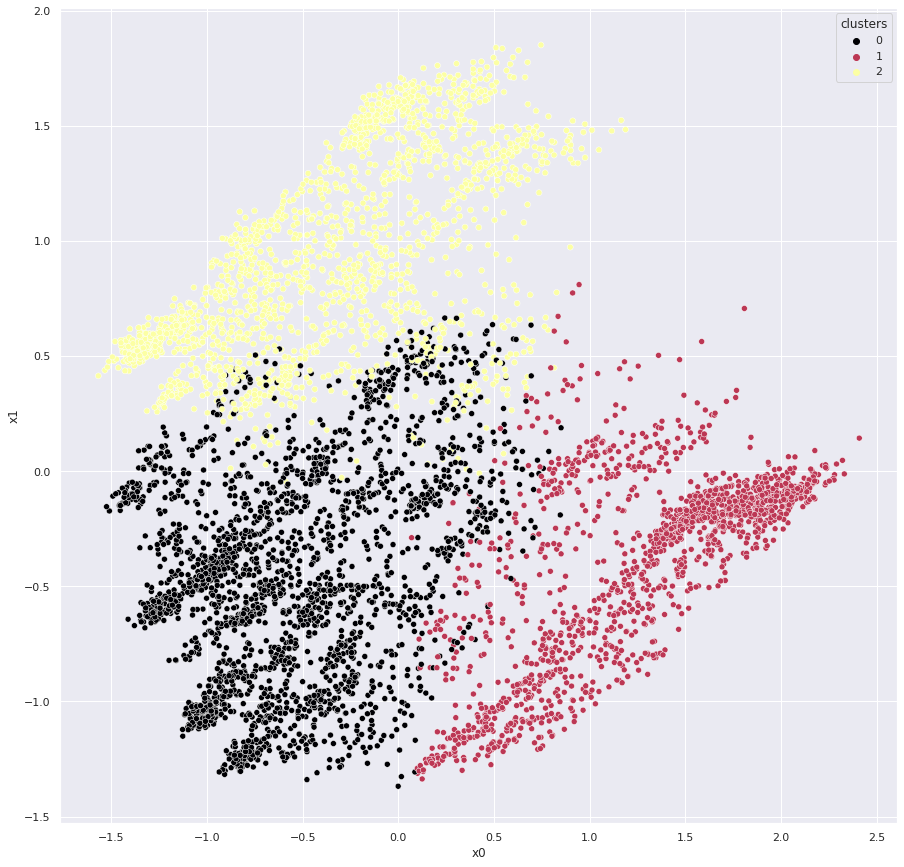

In [ ]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=encoded_df,x='x0',y='x1',hue='clusters',palette='inferno')

In [ ]:
z1=encoded_df.loc[encoded_df['clusters']==0]#ср возр-34, имеются семьи и браки ,почти у всех есть дети (2),  процент дефолта: 30.0%
z2=encoded_df.loc[encoded_df['clusters']==1]#ср возр-27, в основном без семей и детей, имеют более низкий доход семейный, пол примерно равномерный, процент дефолта: 26.8%
z3=encoded_df.loc[encoded_df['clusters']==2]#ср возр-44, имеются семьи и браки ,у многих есть дети (1), кроме 8 (нет детей),   процент дефолта:  19.8%
# Общие отметки: доходы персональные близки, но есть незначительный рост с возрастом, пол в основном 2 у групп 2 и 3,
# Кредиты запрошенные и полученные тоже близки у всех, но вторая и третья группа просят больше с значительными выбросами в максимальную сторону(250к макс).
# Образование, авто растут по мере увеличения возраста

In [ ]:
z1

,ДЕФОЛТ60,ВОЗРАСТ,ПОЛ,ЗАГРАН,ДОХОД_СЕМЬИ_,ДОХОД_НА_ОДНОГО_ЧЛЕНА_СЕМЬИ,ПЕРСОНАЛЬНЫЙ_ДОХОД,СУММА_ВЫДАННОГО_КРЕДИТА,ЗАПРОШЕННАЯ_СУММА,ДОХОД_СУПРУГИ(А),КРЕДИТЫ_ПОГАШЕНЫ,ПЕРВЫЙ_КРЕДИТ,БРАК_1,БРАК_2,БРАК_3,БРАК_4,ДЕТИ_0,ДЕТИ_1,ДЕТИ_2,ДЕТИ_3,ДЕТИ_4,ИЖДИВЕНЦЫ_0,ИЖДИВЕНЦЫ_1,ИЖДИВЕНЦЫ_2,ИЖДИВЕНЦЫ_3,ИЖДИВЕНЦЫ_4,ОБРАЗОВАНИЕ_1,ОБРАЗОВАНИЕ_2,ОБРАЗОВАНИЕ_3,ОБРАЗОВАНИЕ_4,ИНОСТР.ЯЗЫК_1,ИНОСТР.ЯЗЫК_2,ИНОСТР.ЯЗЫК_3,ИНОСТР.ЯЗЫК_4,АВТО_0,АВТО_1,АВТО_2,АВТО_3,ОТРАСЛЬ_1,ОТРАСЛЬ_2,ОТРАСЛЬ_3,ОТРАСЛЬ_4,ОТРАСЛЬ_5,ОТРАСЛЬ_6,ОТРАСЛЬ_7,ОТРАСЛЬ_8,ОТРАСЛЬ_9,ОТРАСЛЬ_10,ОТРАСЛЬ_11,ОТРАСЛЬ_12,ОТРАСЛЬ_13,ОТРАСЛЬ_14,ОТРАСЛЬ_15,ОТРАСЛЬ_16,ОТРАСЛЬ_17,ОТРАСЛЬ_18,ОТРАСЛЬ_19,ОТРАСЛЬ_20,ОТРАСЛЬ_21,ОТРАСЛЬ_22,ОТРАСЛЬ_23,ОТРАСЛЬ_24,ОТРАСЛЬ_25,ОТРАСЛЬ_26,ОТРАСЛЬ_27,ОТРАСЛЬ_28,ОТРАСЛЬ_29,ОТРАСЛЬ_30,ОТРАСЛЬ_31,ОТРАСЛЬ_32,ОТРАСЛЬ_33,ОТРАСЛЬ_34,ОТРАСЛЬ_35,ОТРАСЛЬ_36,ОТРАСЛЬ_37,ОТРАСЛЬ_38,ОТРАСЛЬ_39,ОТРАСЛЬ_40,ОТРАСЛЬ_41,ОТРАСЛЬ_42,РАБОТА_ПО_НАПР_1,РАБОТА_ПО_НАПР_2,РАБОТА_ПО_НАПР_3,РАБОТА_В_ОРГ_1,РАБОТА_В_ОРГ_2,РАБОТА_В_ОРГ_3,ДОЛЖНОСТЬ_1,ДОЛЖНОСТЬ_3,ДОЛЖНОСТЬ_4,ДОЛЖНОСТЬ_5,ДОЛЖНОСТЬ_6,ОТДЕЛЕНИЕ_3,ОТДЕЛЕНИЕ_7,ОТДЕЛЕНИЕ_8,ОТДЕЛЕНИЕ_10,ОТДЕЛЕНИЕ_11,ОТДЕЛЕНИЕ_14,ОТДЕЛЕНИЕ_16,ОТДЕЛЕНИЕ_17,ОТДЕЛЕНИЕ_18,ОТДЕЛЕНИЕ_24,ОТДЕЛЕНИЕ_25,ОТДЕЛЕНИЕ_27,ОТДЕЛЕНИЕ_28,ОТДЕЛЕНИЕ_29,ОТДЕЛЕНИЕ_30,ОТДЕЛЕНИЕ_31,ОТДЕЛЕНИЕ_33,ОТДЕЛЕНИЕ_36,ОТДЕЛЕНИЕ_37,ОТДЕЛЕНИЕ_38,ОТДЕЛЕНИЕ_39,ОТДЕЛЕНИЕ_41,ОТДЕЛЕНИЕ_50,ОТДЕЛЕНИЕ_51,ОТДЕЛЕНИЕ_52,ОТДЕЛЕНИЕ_53,ОТДЕЛЕНИЕ_54,ОТДЕЛЕНИЕ_55,ОТДЕЛЕНИЕ_56,ОТДЕЛЕНИЕ_57,ОТДЕЛЕНИЕ_58,ОТДЕЛЕНИЕ_59,ОТДЕЛЕНИЕ_60,ОТДЕЛЕНИЕ_64,ОТДЕЛЕНИЕ_65,ОТДЕЛЕНИЕ_66,ОТДЕЛЕНИЕ_70,ОТДЕЛЕНИЕ_73,ОТДЕЛЕНИЕ_78,ОТДЕЛЕНИЕ_79,ОТДЕЛЕНИЕ_80,ОТДЕЛЕНИЕ_83,ОТДЕЛЕНИЕ_84,ОТДЕЛЕНИЕ_85,ОТДЕЛЕНИЕ_90,ОТДЕЛЕНИЕ_96,ОТДЕЛЕНИЕ_98,ОТДЕЛЕНИЕ_103,ОТДЕЛЕНИЕ_104,ОТДЕЛЕНИЕ_107,ОТДЕЛЕНИЕ_108,ОТДЕЛЕНИЕ_110,ОТДЕЛЕНИЕ_114,ОТДЕЛЕНИЕ_115,ОТДЕЛЕНИЕ_116,ОТДЕЛЕНИЕ_117,ОТДЕЛЕНИЕ_119,ОТДЕЛЕНИЕ_120,ОТДЕЛЕНИЕ_121,ОТДЕЛЕНИЕ_122,ОТДЕЛЕНИЕ_125,ОТДЕЛЕНИЕ_126,ОТДЕЛЕНИЕ_127,ОТДЕЛЕНИЕ_135,ОТДЕЛЕНИЕ_136,ОТДЕЛЕНИЕ_137,ОТДЕЛЕНИЕ_138,ОТДЕЛЕНИЕ_140,ОТДЕЛЕНИЕ_143,ОТДЕЛЕНИЕ_144,ОТДЕЛЕНИЕ_145,ОТДЕЛЕНИЕ_146,ОТДЕЛЕНИЕ_148,ОТДЕЛЕНИЕ_149,ОТДЕЛЕНИЕ_153,ОТДЕЛЕНИЕ_154,ОТДЕЛЕНИЕ_155,ОТДЕЛЕНИЕ_156,ОТДЕЛЕНИЕ_157,ОТДЕЛЕНИЕ_159,ОТДЕЛЕНИЕ_160,ОТДЕЛЕНИЕ_161,ОТДЕЛЕНИЕ_162,ОТДЕЛЕНИЕ_163,ОТДЕЛЕНИЕ_164,ОТДЕЛЕНИЕ_165,ОТДЕЛЕНИЕ_166,ОТДЕЛЕНИЕ_167,ОТДЕЛЕНИЕ_168,ОТДЕЛЕНИЕ_169,ОТДЕЛЕНИЕ_170,ОТДЕЛЕНИЕ_171,ОТДЕЛЕНИЕ_177,ОТДЕЛЕНИЕ_178,ОТДЕЛЕНИЕ_179,ОТДЕЛЕНИЕ_181,ОТДЕЛЕНИЕ_182,ОТДЕЛЕНИЕ_184,ОТДЕЛЕНИЕ_185,ОТДЕЛЕНИЕ_186,ОТДЕЛЕНИЕ_187,ОТДЕЛЕНИЕ_188,ОТДЕЛЕНИЕ_189,ОТДЕЛЕНИЕ_190,ОТДЕЛЕНИЕ_191,ОТДЕЛЕНИЕ_192,ОТДЕЛЕНИЕ_193,ОТДЕЛЕНИЕ_194,ОТДЕЛЕНИЕ_195,ОТДЕЛЕНИЕ_196,ОТДЕЛЕНИЕ_199,ОТДЕЛЕНИЕ_200,ОТДЕЛЕНИЕ_201,ОТДЕЛЕНИЕ_202,ОТДЕЛЕНИЕ_203,ОТДЕЛЕНИЕ_204,ОТДЕЛЕНИЕ_205,ОТДЕЛЕНИЕ_206,ОТДЕЛЕНИЕ_208,ОТДЕЛЕНИЕ_210,ОТДЕЛЕНИЕ_211,ОТДЕЛЕНИЕ_212,ОТДЕЛЕНИЕ_213,ОТДЕЛЕНИЕ_214,ОТДЕЛЕНИЕ_216,ОТДЕЛЕНИЕ_217,ОТДЕЛЕНИЕ_218,ОТДЕЛЕНИЕ_219,ОТДЕЛЕНИЕ_220,ОТДЕЛЕНИЕ_223,ОТДЕЛЕНИЕ_224,ОТДЕЛЕНИЕ_225,ОТДЕЛЕНИЕ_226,ОТДЕЛЕНИЕ_227,ОТДЕЛЕНИЕ_228,ОТДЕЛЕНИЕ_229,ОТДЕЛЕНИЕ_230,ОТДЕЛЕНИЕ_231,ОТДЕЛЕНИЕ_232,ОТДЕЛЕНИЕ_240,ОТДЕЛЕНИЕ_241,ОТДЕЛЕНИЕ_243,ОТДЕЛЕНИЕ_247,ОТДЕЛЕНИЕ_248,ОТДЕЛЕНИЕ_249,ОТДЕЛЕНИЕ_257,ГОРОД_1,ГОРОД_2,ГОРОД_3,ГОРОД_4,ГОРОД_5,ГОРОД_6,ГОРОД_7,ГОРОД_8,ГОРОД_9,ГОРОД_10,ГОРОД_11,ГОРОД_12,ГОРОД_13,ГОРОД_14,ГОРОД_15,ГОРОД_16,ГОРОД_17,ГОРОД_18,ГОРОД_19,ГОРОД_20,ГОРОД_21,ГОРОД_22,ГОРОД_23,ГОРОД_24,ГОРОД_27,ГОРОД_29,ГОРОД_30,ГОРОД_31,ГОРОД_32,ГОРОД_33,ГОРОД_35,СОБСТВЕННИК_ФАКТ._0,СОБСТВЕННИК_ФАКТ._1,СОБСТВЕННИК_ФАКТ._2,СОБСТВЕННИК_ФАКТ._3,СОБСТВЕННИК_ФАКТ._4,СОБСТВЕННИК_ФАКТ._5,СОБСТВЕННИК_ФАКТ._6,СМЕНА_МЖ_0,СМЕНА_МЖ_1,СМЕНА_МЖ_2,СМЕНА_МЖ_3,СМЕНА_МЖ_4,clusters,x0,x1
1,0,0.282621,2,0,0.096447,0.058929,0.259259,0.174300,0.473684,0.060,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
z2

,ДЕФОЛТ60,ВОЗРАСТ,ПОЛ,ЗАГРАН,ДОХОД_СЕМЬИ_,ДОХОД_НА_ОДНОГО_ЧЛЕНА_СЕМЬИ,ПЕРСОНАЛЬНЫЙ_ДОХОД,СУММА_ВЫДАННОГО_КРЕДИТА,ЗАПРОШЕННАЯ_СУММА,ДОХОД_СУПРУГИ(А),КРЕДИТЫ_ПОГАШЕНЫ,ПЕРВЫЙ_КРЕДИТ,БРАК_1,БРАК_2,БРАК_3,БРАК_4,ДЕТИ_0,ДЕТИ_1,ДЕТИ_2,ДЕТИ_3,ДЕТИ_4,ИЖДИВЕНЦЫ_0,ИЖДИВЕНЦЫ_1,ИЖДИВЕНЦЫ_2,ИЖДИВЕНЦЫ_3,ИЖДИВЕНЦЫ_4,ОБРАЗОВАНИЕ_1,ОБРАЗОВАНИЕ_2,ОБРАЗОВАНИЕ_3,ОБРАЗОВАНИЕ_4,ИНОСТР.ЯЗЫК_1,ИНОСТР.ЯЗЫК_2,ИНОСТР.ЯЗЫК_3,ИНОСТР.ЯЗЫК_4,АВТО_0,АВТО_1,АВТО_2,АВТО_3,ОТРАСЛЬ_1,ОТРАСЛЬ_2,ОТРАСЛЬ_3,ОТРАСЛЬ_4,ОТРАСЛЬ_5,ОТРАСЛЬ_6,ОТРАСЛЬ_7,ОТРАСЛЬ_8,ОТРАСЛЬ_9,ОТРАСЛЬ_10,ОТРАСЛЬ_11,ОТРАСЛЬ_12,ОТРАСЛЬ_13,ОТРАСЛЬ_14,ОТРАСЛЬ_15,ОТРАСЛЬ_16,ОТРАСЛЬ_17,ОТРАСЛЬ_18,ОТРАСЛЬ_19,ОТРАСЛЬ_20,ОТРАСЛЬ_21,ОТРАСЛЬ_22,ОТРАСЛЬ_23,ОТРАСЛЬ_24,ОТРАСЛЬ_25,ОТРАСЛЬ_26,ОТРАСЛЬ_27,ОТРАСЛЬ_28,ОТРАСЛЬ_29,ОТРАСЛЬ_30,ОТРАСЛЬ_31,ОТРАСЛЬ_32,ОТРАСЛЬ_33,ОТРАСЛЬ_34,ОТРАСЛЬ_35,ОТРАСЛЬ_36,ОТРАСЛЬ_37,ОТРАСЛЬ_38,ОТРАСЛЬ_39,ОТРАСЛЬ_40,ОТРАСЛЬ_41,ОТРАСЛЬ_42,РАБОТА_ПО_НАПР_1,РАБОТА_ПО_НАПР_2,РАБОТА_ПО_НАПР_3,РАБОТА_В_ОРГ_1,РАБОТА_В_ОРГ_2,РАБОТА_В_ОРГ_3,ДОЛЖНОСТЬ_1,ДОЛЖНОСТЬ_3,ДОЛЖНОСТЬ_4,ДОЛЖНОСТЬ_5,ДОЛЖНОСТЬ_6,ОТДЕЛЕНИЕ_3,ОТДЕЛЕНИЕ_7,ОТДЕЛЕНИЕ_8,ОТДЕЛЕНИЕ_10,ОТДЕЛЕНИЕ_11,ОТДЕЛЕНИЕ_14,ОТДЕЛЕНИЕ_16,ОТДЕЛЕНИЕ_17,ОТДЕЛЕНИЕ_18,ОТДЕЛЕНИЕ_24,ОТДЕЛЕНИЕ_25,ОТДЕЛЕНИЕ_27,ОТДЕЛЕНИЕ_28,ОТДЕЛЕНИЕ_29,ОТДЕЛЕНИЕ_30,ОТДЕЛЕНИЕ_31,ОТДЕЛЕНИЕ_33,ОТДЕЛЕНИЕ_36,ОТДЕЛЕНИЕ_37,ОТДЕЛЕНИЕ_38,ОТДЕЛЕНИЕ_39,ОТДЕЛЕНИЕ_41,ОТДЕЛЕНИЕ_50,ОТДЕЛЕНИЕ_51,ОТДЕЛЕНИЕ_52,ОТДЕЛЕНИЕ_53,ОТДЕЛЕНИЕ_54,ОТДЕЛЕНИЕ_55,ОТДЕЛЕНИЕ_56,ОТДЕЛЕНИЕ_57,ОТДЕЛЕНИЕ_58,ОТДЕЛЕНИЕ_59,ОТДЕЛЕНИЕ_60,ОТДЕЛЕНИЕ_64,ОТДЕЛЕНИЕ_65,ОТДЕЛЕНИЕ_66,ОТДЕЛЕНИЕ_70,ОТДЕЛЕНИЕ_73,ОТДЕЛЕНИЕ_78,ОТДЕЛЕНИЕ_79,ОТДЕЛЕНИЕ_80,ОТДЕЛЕНИЕ_83,ОТДЕЛЕНИЕ_84,ОТДЕЛЕНИЕ_85,ОТДЕЛЕНИЕ_90,ОТДЕЛЕНИЕ_96,ОТДЕЛЕНИЕ_98,ОТДЕЛЕНИЕ_103,ОТДЕЛЕНИЕ_104,ОТДЕЛЕНИЕ_107,ОТДЕЛЕНИЕ_108,ОТДЕЛЕНИЕ_110,ОТДЕЛЕНИЕ_114,ОТДЕЛЕНИЕ_115,ОТДЕЛЕНИЕ_116,ОТДЕЛЕНИЕ_117,ОТДЕЛЕНИЕ_119,ОТДЕЛЕНИЕ_120,ОТДЕЛЕНИЕ_121,ОТДЕЛЕНИЕ_122,ОТДЕЛЕНИЕ_125,ОТДЕЛЕНИЕ_126,ОТДЕЛЕНИЕ_127,ОТДЕЛЕНИЕ_135,ОТДЕЛЕНИЕ_136,ОТДЕЛЕНИЕ_137,ОТДЕЛЕНИЕ_138,ОТДЕЛЕНИЕ_140,ОТДЕЛЕНИЕ_143,ОТДЕЛЕНИЕ_144,ОТДЕЛЕНИЕ_145,ОТДЕЛЕНИЕ_146,ОТДЕЛЕНИЕ_148,ОТДЕЛЕНИЕ_149,ОТДЕЛЕНИЕ_153,ОТДЕЛЕНИЕ_154,ОТДЕЛЕНИЕ_155,ОТДЕЛЕНИЕ_156,ОТДЕЛЕНИЕ_157,ОТДЕЛЕНИЕ_159,ОТДЕЛЕНИЕ_160,ОТДЕЛЕНИЕ_161,ОТДЕЛЕНИЕ_162,ОТДЕЛЕНИЕ_163,ОТДЕЛЕНИЕ_164,ОТДЕЛЕНИЕ_165,ОТДЕЛЕНИЕ_166,ОТДЕЛЕНИЕ_167,ОТДЕЛЕНИЕ_168,ОТДЕЛЕНИЕ_169,ОТДЕЛЕНИЕ_170,ОТДЕЛЕНИЕ_171,ОТДЕЛЕНИЕ_177,ОТДЕЛЕНИЕ_178,ОТДЕЛЕНИЕ_179,ОТДЕЛЕНИЕ_181,ОТДЕЛЕНИЕ_182,ОТДЕЛЕНИЕ_184,ОТДЕЛЕНИЕ_185,ОТДЕЛЕНИЕ_186,ОТДЕЛЕНИЕ_187,ОТДЕЛЕНИЕ_188,ОТДЕЛЕНИЕ_189,ОТДЕЛЕНИЕ_190,ОТДЕЛЕНИЕ_191,ОТДЕЛЕНИЕ_192,ОТДЕЛЕНИЕ_193,ОТДЕЛЕНИЕ_194,ОТДЕЛЕНИЕ_195,ОТДЕЛЕНИЕ_196,ОТДЕЛЕНИЕ_199,ОТДЕЛЕНИЕ_200,ОТДЕЛЕНИЕ_201,ОТДЕЛЕНИЕ_202,ОТДЕЛЕНИЕ_203,ОТДЕЛЕНИЕ_204,ОТДЕЛЕНИЕ_205,ОТДЕЛЕНИЕ_206,ОТДЕЛЕНИЕ_208,ОТДЕЛЕНИЕ_210,ОТДЕЛЕНИЕ_211,ОТДЕЛЕНИЕ_212,ОТДЕЛЕНИЕ_213,ОТДЕЛЕНИЕ_214,ОТДЕЛЕНИЕ_216,ОТДЕЛЕНИЕ_217,ОТДЕЛЕНИЕ_218,ОТДЕЛЕНИЕ_219,ОТДЕЛЕНИЕ_220,ОТДЕЛЕНИЕ_223,ОТДЕЛЕНИЕ_224,ОТДЕЛЕНИЕ_225,ОТДЕЛЕНИЕ_226,ОТДЕЛЕНИЕ_227,ОТДЕЛЕНИЕ_228,ОТДЕЛЕНИЕ_229,ОТДЕЛЕНИЕ_230,ОТДЕЛЕНИЕ_231,ОТДЕЛЕНИЕ_232,ОТДЕЛЕНИЕ_240,ОТДЕЛЕНИЕ_241,ОТДЕЛЕНИЕ_243,ОТДЕЛЕНИЕ_247,ОТДЕЛЕНИЕ_248,ОТДЕЛЕНИЕ_249,ОТДЕЛЕНИЕ_257,ГОРОД_1,ГОРОД_2,ГОРОД_3,ГОРОД_4,ГОРОД_5,ГОРОД_6,ГОРОД_7,ГОРОД_8,ГОРОД_9,ГОРОД_10,ГОРОД_11,ГОРОД_12,ГОРОД_13,ГОРОД_14,ГОРОД_15,ГОРОД_16,ГОРОД_17,ГОРОД_18,ГОРОД_19,ГОРОД_20,ГОРОД_21,ГОРОД_22,ГОРОД_23,ГОРОД_24,ГОРОД_27,ГОРОД_29,ГОРОД_30,ГОРОД_31,ГОРОД_32,ГОРОД_33,ГОРОД_35,СОБСТВЕННИК_ФАКТ._0,СОБСТВЕННИК_ФАКТ._1,СОБСТВЕННИК_ФАКТ._2,СОБСТВЕННИК_ФАКТ._3,СОБСТВЕННИК_ФАКТ._4,СОБСТВЕННИК_ФАКТ._5,СОБСТВЕННИК_ФАКТ._6,СМЕНА_МЖ_0,СМЕНА_МЖ_1,СМЕНА_МЖ_2,СМЕНА_МЖ_3,СМЕНА_МЖ_4,clusters,x0,x1
0,0,0.156033,1,0,0.086294,0.214286,0.629630,0.213034,0.578947,0.000,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
z3

,ДЕФОЛТ60,ВОЗРАСТ,ПОЛ,ЗАГРАН,ДОХОД_СЕМЬИ_,ДОХОД_НА_ОДНОГО_ЧЛЕНА_СЕМЬИ,ПЕРСОНАЛЬНЫЙ_ДОХОД,СУММА_ВЫДАННОГО_КРЕДИТА,ЗАПРОШЕННАЯ_СУММА,ДОХОД_СУПРУГИ(А),КРЕДИТЫ_ПОГАШЕНЫ,ПЕРВЫЙ_КРЕДИТ,БРАК_1,БРАК_2,БРАК_3,БРАК_4,ДЕТИ_0,ДЕТИ_1,ДЕТИ_2,ДЕТИ_3,ДЕТИ_4,ИЖДИВЕНЦЫ_0,ИЖДИВЕНЦЫ_1,ИЖДИВЕНЦЫ_2,ИЖДИВЕНЦЫ_3,ИЖДИВЕНЦЫ_4,ОБРАЗОВАНИЕ_1,ОБРАЗОВАНИЕ_2,ОБРАЗОВАНИЕ_3,ОБРАЗОВАНИЕ_4,ИНОСТР.ЯЗЫК_1,ИНОСТР.ЯЗЫК_2,ИНОСТР.ЯЗЫК_3,ИНОСТР.ЯЗЫК_4,АВТО_0,АВТО_1,АВТО_2,АВТО_3,ОТРАСЛЬ_1,ОТРАСЛЬ_2,ОТРАСЛЬ_3,ОТРАСЛЬ_4,ОТРАСЛЬ_5,ОТРАСЛЬ_6,ОТРАСЛЬ_7,ОТРАСЛЬ_8,ОТРАСЛЬ_9,ОТРАСЛЬ_10,ОТРАСЛЬ_11,ОТРАСЛЬ_12,ОТРАСЛЬ_13,ОТРАСЛЬ_14,ОТРАСЛЬ_15,ОТРАСЛЬ_16,ОТРАСЛЬ_17,ОТРАСЛЬ_18,ОТРАСЛЬ_19,ОТРАСЛЬ_20,ОТРАСЛЬ_21,ОТРАСЛЬ_22,ОТРАСЛЬ_23,ОТРАСЛЬ_24,ОТРАСЛЬ_25,ОТРАСЛЬ_26,ОТРАСЛЬ_27,ОТРАСЛЬ_28,ОТРАСЛЬ_29,ОТРАСЛЬ_30,ОТРАСЛЬ_31,ОТРАСЛЬ_32,ОТРАСЛЬ_33,ОТРАСЛЬ_34,ОТРАСЛЬ_35,ОТРАСЛЬ_36,ОТРАСЛЬ_37,ОТРАСЛЬ_38,ОТРАСЛЬ_39,ОТРАСЛЬ_40,ОТРАСЛЬ_41,ОТРАСЛЬ_42,РАБОТА_ПО_НАПР_1,РАБОТА_ПО_НАПР_2,РАБОТА_ПО_НАПР_3,РАБОТА_В_ОРГ_1,РАБОТА_В_ОРГ_2,РАБОТА_В_ОРГ_3,ДОЛЖНОСТЬ_1,ДОЛЖНОСТЬ_3,ДОЛЖНОСТЬ_4,ДОЛЖНОСТЬ_5,ДОЛЖНОСТЬ_6,ОТДЕЛЕНИЕ_3,ОТДЕЛЕНИЕ_7,ОТДЕЛЕНИЕ_8,ОТДЕЛЕНИЕ_10,ОТДЕЛЕНИЕ_11,ОТДЕЛЕНИЕ_14,ОТДЕЛЕНИЕ_16,ОТДЕЛЕНИЕ_17,ОТДЕЛЕНИЕ_18,ОТДЕЛЕНИЕ_24,ОТДЕЛЕНИЕ_25,ОТДЕЛЕНИЕ_27,ОТДЕЛЕНИЕ_28,ОТДЕЛЕНИЕ_29,ОТДЕЛЕНИЕ_30,ОТДЕЛЕНИЕ_31,ОТДЕЛЕНИЕ_33,ОТДЕЛЕНИЕ_36,ОТДЕЛЕНИЕ_37,ОТДЕЛЕНИЕ_38,ОТДЕЛЕНИЕ_39,ОТДЕЛЕНИЕ_41,ОТДЕЛЕНИЕ_50,ОТДЕЛЕНИЕ_51,ОТДЕЛЕНИЕ_52,ОТДЕЛЕНИЕ_53,ОТДЕЛЕНИЕ_54,ОТДЕЛЕНИЕ_55,ОТДЕЛЕНИЕ_56,ОТДЕЛЕНИЕ_57,ОТДЕЛЕНИЕ_58,ОТДЕЛЕНИЕ_59,ОТДЕЛЕНИЕ_60,ОТДЕЛЕНИЕ_64,ОТДЕЛЕНИЕ_65,ОТДЕЛЕНИЕ_66,ОТДЕЛЕНИЕ_70,ОТДЕЛЕНИЕ_73,ОТДЕЛЕНИЕ_78,ОТДЕЛЕНИЕ_79,ОТДЕЛЕНИЕ_80,ОТДЕЛЕНИЕ_83,ОТДЕЛЕНИЕ_84,ОТДЕЛЕНИЕ_85,ОТДЕЛЕНИЕ_90,ОТДЕЛЕНИЕ_96,ОТДЕЛЕНИЕ_98,ОТДЕЛЕНИЕ_103,ОТДЕЛЕНИЕ_104,ОТДЕЛЕНИЕ_107,ОТДЕЛЕНИЕ_108,ОТДЕЛЕНИЕ_110,ОТДЕЛЕНИЕ_114,ОТДЕЛЕНИЕ_115,ОТДЕЛЕНИЕ_116,ОТДЕЛЕНИЕ_117,ОТДЕЛЕНИЕ_119,ОТДЕЛЕНИЕ_120,ОТДЕЛЕНИЕ_121,ОТДЕЛЕНИЕ_122,ОТДЕЛЕНИЕ_125,ОТДЕЛЕНИЕ_126,ОТДЕЛЕНИЕ_127,ОТДЕЛЕНИЕ_135,ОТДЕЛЕНИЕ_136,ОТДЕЛЕНИЕ_137,ОТДЕЛЕНИЕ_138,ОТДЕЛЕНИЕ_140,ОТДЕЛЕНИЕ_143,ОТДЕЛЕНИЕ_144,ОТДЕЛЕНИЕ_145,ОТДЕЛЕНИЕ_146,ОТДЕЛЕНИЕ_148,ОТДЕЛЕНИЕ_149,ОТДЕЛЕНИЕ_153,ОТДЕЛЕНИЕ_154,ОТДЕЛЕНИЕ_155,ОТДЕЛЕНИЕ_156,ОТДЕЛЕНИЕ_157,ОТДЕЛЕНИЕ_159,ОТДЕЛЕНИЕ_160,ОТДЕЛЕНИЕ_161,ОТДЕЛЕНИЕ_162,ОТДЕЛЕНИЕ_163,ОТДЕЛЕНИЕ_164,ОТДЕЛЕНИЕ_165,ОТДЕЛЕНИЕ_166,ОТДЕЛЕНИЕ_167,ОТДЕЛЕНИЕ_168,ОТДЕЛЕНИЕ_169,ОТДЕЛЕНИЕ_170,ОТДЕЛЕНИЕ_171,ОТДЕЛЕНИЕ_177,ОТДЕЛЕНИЕ_178,ОТДЕЛЕНИЕ_179,ОТДЕЛЕНИЕ_181,ОТДЕЛЕНИЕ_182,ОТДЕЛЕНИЕ_184,ОТДЕЛЕНИЕ_185,ОТДЕЛЕНИЕ_186,ОТДЕЛЕНИЕ_187,ОТДЕЛЕНИЕ_188,ОТДЕЛЕНИЕ_189,ОТДЕЛЕНИЕ_190,ОТДЕЛЕНИЕ_191,ОТДЕЛЕНИЕ_192,ОТДЕЛЕНИЕ_193,ОТДЕЛЕНИЕ_194,ОТДЕЛЕНИЕ_195,ОТДЕЛЕНИЕ_196,ОТДЕЛЕНИЕ_199,ОТДЕЛЕНИЕ_200,ОТДЕЛЕНИЕ_201,ОТДЕЛЕНИЕ_202,ОТДЕЛЕНИЕ_203,ОТДЕЛЕНИЕ_204,ОТДЕЛЕНИЕ_205,ОТДЕЛЕНИЕ_206,ОТДЕЛЕНИЕ_208,ОТДЕЛЕНИЕ_210,ОТДЕЛЕНИЕ_211,ОТДЕЛЕНИЕ_212,ОТДЕЛЕНИЕ_213,ОТДЕЛЕНИЕ_214,ОТДЕЛЕНИЕ_216,ОТДЕЛЕНИЕ_217,ОТДЕЛЕНИЕ_218,ОТДЕЛЕНИЕ_219,ОТДЕЛЕНИЕ_220,ОТДЕЛЕНИЕ_223,ОТДЕЛЕНИЕ_224,ОТДЕЛЕНИЕ_225,ОТДЕЛЕНИЕ_226,ОТДЕЛЕНИЕ_227,ОТДЕЛЕНИЕ_228,ОТДЕЛЕНИЕ_229,ОТДЕЛЕНИЕ_230,ОТДЕЛЕНИЕ_231,ОТДЕЛЕНИЕ_232,ОТДЕЛЕНИЕ_240,ОТДЕЛЕНИЕ_241,ОТДЕЛЕНИЕ_243,ОТДЕЛЕНИЕ_247,ОТДЕЛЕНИЕ_248,ОТДЕЛЕНИЕ_249,ОТДЕЛЕНИЕ_257,ГОРОД_1,ГОРОД_2,ГОРОД_3,ГОРОД_4,ГОРОД_5,ГОРОД_6,ГОРОД_7,ГОРОД_8,ГОРОД_9,ГОРОД_10,ГОРОД_11,ГОРОД_12,ГОРОД_13,ГОРОД_14,ГОРОД_15,ГОРОД_16,ГОРОД_17,ГОРОД_18,ГОРОД_19,ГОРОД_20,ГОРОД_21,ГОРОД_22,ГОРОД_23,ГОРОД_24,ГОРОД_27,ГОРОД_29,ГОРОД_30,ГОРОД_31,ГОРОД_32,ГОРОД_33,ГОРОД_35,СОБСТВЕННИК_ФАКТ._0,СОБСТВЕННИК_ФАКТ._1,СОБСТВЕННИК_ФАКТ._2,СОБСТВЕННИК_ФАКТ._3,СОБСТВЕННИК_ФАКТ._4,СОБСТВЕННИК_ФАКТ._5,СОБСТВЕННИК_ФАКТ._6,СМЕНА_МЖ_0,СМЕНА_МЖ_1,СМЕНА_МЖ_2,СМЕНА_МЖ_3,СМЕНА_МЖ_4,clusters,x0,x1
2,1,0.056871,1,0,0.060914,0.053572,0.444444,0.096834,0.263158,0.000,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

#Classification with XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score

xgbclassifier=xgb.XGBClassifier(learning_rate=0.01,n_estimators=100, colsample_bytree=0.5,objective='binary:logistic')

In [ ]:
encoded_df

,ДЕФОЛТ60,ВОЗРАСТ,ПОЛ,ЗАГРАН,ДОХОД_СЕМЬИ_,ДОХОД_НА_ОДНОГО_ЧЛЕНА_СЕМЬИ,ПЕРСОНАЛЬНЫЙ_ДОХОД,СУММА_ВЫДАННОГО_КРЕДИТА,ЗАПРОШЕННАЯ_СУММА,ДОХОД_СУПРУГИ(А),КРЕДИТЫ_ПОГАШЕНЫ,ПЕРВЫЙ_КРЕДИТ,БРАК_1,БРАК_2,БРАК_3,БРАК_4,ДЕТИ_0,ДЕТИ_1,ДЕТИ_2,ДЕТИ_3,ДЕТИ_4,ИЖДИВЕНЦЫ_0,ИЖДИВЕНЦЫ_1,ИЖДИВЕНЦЫ_2,ИЖДИВЕНЦЫ_3,ИЖДИВЕНЦЫ_4,ОБРАЗОВАНИЕ_1,ОБРАЗОВАНИЕ_2,ОБРАЗОВАНИЕ_3,ОБРАЗОВАНИЕ_4,ИНОСТР.ЯЗЫК_1,ИНОСТР.ЯЗЫК_2,ИНОСТР.ЯЗЫК_3,ИНОСТР.ЯЗЫК_4,АВТО_0,АВТО_1,АВТО_2,АВТО_3,ОТРАСЛЬ_1,ОТРАСЛЬ_2,ОТРАСЛЬ_3,ОТРАСЛЬ_4,ОТРАСЛЬ_5,ОТРАСЛЬ_6,ОТРАСЛЬ_7,ОТРАСЛЬ_8,ОТРАСЛЬ_9,ОТРАСЛЬ_10,ОТРАСЛЬ_11,ОТРАСЛЬ_12,ОТРАСЛЬ_13,ОТРАСЛЬ_14,ОТРАСЛЬ_15,ОТРАСЛЬ_16,ОТРАСЛЬ_17,ОТРАСЛЬ_18,ОТРАСЛЬ_19,ОТРАСЛЬ_20,ОТРАСЛЬ_21,ОТРАСЛЬ_22,ОТРАСЛЬ_23,ОТРАСЛЬ_24,ОТРАСЛЬ_25,ОТРАСЛЬ_26,ОТРАСЛЬ_27,ОТРАСЛЬ_28,ОТРАСЛЬ_29,ОТРАСЛЬ_30,ОТРАСЛЬ_31,ОТРАСЛЬ_32,ОТРАСЛЬ_33,ОТРАСЛЬ_34,ОТРАСЛЬ_35,ОТРАСЛЬ_36,ОТРАСЛЬ_37,ОТРАСЛЬ_38,ОТРАСЛЬ_39,ОТРАСЛЬ_40,ОТРАСЛЬ_41,ОТРАСЛЬ_42,РАБОТА_ПО_НАПР_1,РАБОТА_ПО_НАПР_2,РАБОТА_ПО_НАПР_3,РАБОТА_В_ОРГ_1,РАБОТА_В_ОРГ_2,РАБОТА_В_ОРГ_3,ДОЛЖНОСТЬ_1,ДОЛЖНОСТЬ_3,ДОЛЖНОСТЬ_4,ДОЛЖНОСТЬ_5,ДОЛЖНОСТЬ_6,ОТДЕЛЕНИЕ_3,ОТДЕЛЕНИЕ_7,ОТДЕЛЕНИЕ_8,ОТДЕЛЕНИЕ_10,ОТДЕЛЕНИЕ_11,ОТДЕЛЕНИЕ_14,ОТДЕЛЕНИЕ_16,ОТДЕЛЕНИЕ_17,ОТДЕЛЕНИЕ_18,ОТДЕЛЕНИЕ_24,ОТДЕЛЕНИЕ_25,ОТДЕЛЕНИЕ_27,ОТДЕЛЕНИЕ_28,ОТДЕЛЕНИЕ_29,ОТДЕЛЕНИЕ_30,ОТДЕЛЕНИЕ_31,ОТДЕЛЕНИЕ_33,ОТДЕЛЕНИЕ_36,ОТДЕЛЕНИЕ_37,ОТДЕЛЕНИЕ_38,ОТДЕЛЕНИЕ_39,ОТДЕЛЕНИЕ_41,ОТДЕЛЕНИЕ_50,ОТДЕЛЕНИЕ_51,ОТДЕЛЕНИЕ_52,ОТДЕЛЕНИЕ_53,ОТДЕЛЕНИЕ_54,ОТДЕЛЕНИЕ_55,ОТДЕЛЕНИЕ_56,ОТДЕЛЕНИЕ_57,ОТДЕЛЕНИЕ_58,ОТДЕЛЕНИЕ_59,ОТДЕЛЕНИЕ_60,ОТДЕЛЕНИЕ_64,ОТДЕЛЕНИЕ_65,ОТДЕЛЕНИЕ_66,ОТДЕЛЕНИЕ_70,ОТДЕЛЕНИЕ_73,ОТДЕЛЕНИЕ_78,ОТДЕЛЕНИЕ_79,ОТДЕЛЕНИЕ_80,ОТДЕЛЕНИЕ_83,ОТДЕЛЕНИЕ_84,ОТДЕЛЕНИЕ_85,ОТДЕЛЕНИЕ_90,ОТДЕЛЕНИЕ_96,ОТДЕЛЕНИЕ_98,ОТДЕЛЕНИЕ_103,ОТДЕЛЕНИЕ_104,ОТДЕЛЕНИЕ_107,ОТДЕЛЕНИЕ_108,ОТДЕЛЕНИЕ_110,ОТДЕЛЕНИЕ_114,ОТДЕЛЕНИЕ_115,ОТДЕЛЕНИЕ_116,ОТДЕЛЕНИЕ_117,ОТДЕЛЕНИЕ_119,ОТДЕЛЕНИЕ_120,ОТДЕЛЕНИЕ_121,ОТДЕЛЕНИЕ_122,ОТДЕЛЕНИЕ_125,ОТДЕЛЕНИЕ_126,ОТДЕЛЕНИЕ_127,ОТДЕЛЕНИЕ_135,ОТДЕЛЕНИЕ_136,ОТДЕЛЕНИЕ_137,ОТДЕЛЕНИЕ_138,ОТДЕЛЕНИЕ_140,ОТДЕЛЕНИЕ_143,ОТДЕЛЕНИЕ_144,ОТДЕЛЕНИЕ_145,ОТДЕЛЕНИЕ_146,ОТДЕЛЕНИЕ_148,ОТДЕЛЕНИЕ_149,ОТДЕЛЕНИЕ_153,ОТДЕЛЕНИЕ_154,ОТДЕЛЕНИЕ_155,ОТДЕЛЕНИЕ_156,ОТДЕЛЕНИЕ_157,ОТДЕЛЕНИЕ_159,ОТДЕЛЕНИЕ_160,ОТДЕЛЕНИЕ_161,ОТДЕЛЕНИЕ_162,ОТДЕЛЕНИЕ_163,ОТДЕЛЕНИЕ_164,ОТДЕЛЕНИЕ_165,ОТДЕЛЕНИЕ_166,ОТДЕЛЕНИЕ_167,ОТДЕЛЕНИЕ_168,ОТДЕЛЕНИЕ_169,ОТДЕЛЕНИЕ_170,ОТДЕЛЕНИЕ_171,ОТДЕЛЕНИЕ_177,ОТДЕЛЕНИЕ_178,ОТДЕЛЕНИЕ_179,ОТДЕЛЕНИЕ_181,ОТДЕЛЕНИЕ_182,ОТДЕЛЕНИЕ_184,ОТДЕЛЕНИЕ_185,ОТДЕЛЕНИЕ_186,ОТДЕЛЕНИЕ_187,ОТДЕЛЕНИЕ_188,ОТДЕЛЕНИЕ_189,ОТДЕЛЕНИЕ_190,ОТДЕЛЕНИЕ_191,ОТДЕЛЕНИЕ_192,ОТДЕЛЕНИЕ_193,ОТДЕЛЕНИЕ_194,ОТДЕЛЕНИЕ_195,ОТДЕЛЕНИЕ_196,ОТДЕЛЕНИЕ_199,ОТДЕЛЕНИЕ_200,ОТДЕЛЕНИЕ_201,ОТДЕЛЕНИЕ_202,ОТДЕЛЕНИЕ_203,ОТДЕЛЕНИЕ_204,ОТДЕЛЕНИЕ_205,ОТДЕЛЕНИЕ_206,ОТДЕЛЕНИЕ_208,ОТДЕЛЕНИЕ_210,ОТДЕЛЕНИЕ_211,ОТДЕЛЕНИЕ_212,ОТДЕЛЕНИЕ_213,ОТДЕЛЕНИЕ_214,ОТДЕЛЕНИЕ_216,ОТДЕЛЕНИЕ_217,ОТДЕЛЕНИЕ_218,ОТДЕЛЕНИЕ_219,ОТДЕЛЕНИЕ_220,ОТДЕЛЕНИЕ_223,ОТДЕЛЕНИЕ_224,ОТДЕЛЕНИЕ_225,ОТДЕЛЕНИЕ_226,ОТДЕЛЕНИЕ_227,ОТДЕЛЕНИЕ_228,ОТДЕЛЕНИЕ_229,ОТДЕЛЕНИЕ_230,ОТДЕЛЕНИЕ_231,ОТДЕЛЕНИЕ_232,ОТДЕЛЕНИЕ_240,ОТДЕЛЕНИЕ_241,ОТДЕЛЕНИЕ_243,ОТДЕЛЕНИЕ_247,ОТДЕЛЕНИЕ_248,ОТДЕЛЕНИЕ_249,ОТДЕЛЕНИЕ_257,ГОРОД_1,ГОРОД_2,ГОРОД_3,ГОРОД_4,ГОРОД_5,ГОРОД_6,ГОРОД_7,ГОРОД_8,ГОРОД_9,ГОРОД_10,ГОРОД_11,ГОРОД_12,ГОРОД_13,ГОРОД_14,ГОРОД_15,ГОРОД_16,ГОРОД_17,ГОРОД_18,ГОРОД_19,ГОРОД_20,ГОРОД_21,ГОРОД_22,ГОРОД_23,ГОРОД_24,ГОРОД_27,ГОРОД_29,ГОРОД_30,ГОРОД_31,ГОРОД_32,ГОРОД_33,ГОРОД_35,СОБСТВЕННИК_ФАКТ._0,СОБСТВЕННИК_ФАКТ._1,СОБСТВЕННИК_ФАКТ._2,СОБСТВЕННИК_ФАКТ._3,СОБСТВЕННИК_ФАКТ._4,СОБСТВЕННИК_ФАКТ._5,СОБСТВЕННИК_ФАКТ._6,СМЕНА_МЖ_0,СМЕНА_МЖ_1,СМЕНА_МЖ_2,СМЕНА_МЖ_3,СМЕНА_МЖ_4,clusters,x0,x1
0,0,0.156033,1,0,0.086294,0.214286,0.629630,0.213034,0.578947,0.000,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
y=encoded_df['ДЕФОЛТ60']
X=encoded_df.drop(columns=['ДЕФОЛТ60','x0','x1','clusters'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y,test_size=0.25,shuffle=True)

In [ ]:
xgbclassifier.fit(X_train, y_train,eval_set=[(X_train, y_train), (X_test, y_test)],eval_metric='auc')

[0]	validation_0-auc:0.590833	validation_1-auc:0.586216
[1]	validation_0-auc:0.591212	validation_1-auc:0.586318
[2]	validation_0-auc:0.638686	validation_1-auc:0.610488
[3]	validation_0-auc:0.637557	validation_1-auc:0.614841
[4]	validation_0-auc:0.660096	validation_1-auc:0.633379
[5]	validation_0-auc:0.667406	validation_1-auc:0.634601
[6]	validation_0-auc:0.666948	validation_1-auc:0.633973
[7]	validation_0-auc:0.667334	validation_1-auc:0.635092
[8]	validation_0-auc:0.672521	validation_1-auc:0.640726
[9]	validation_0-auc:0.672545	validation_1-auc:0.63772
[10]	validation_0-auc:0.671881	validation_1-auc:0.638515
[11]	validation_0-auc:0.671588	validation_1-auc:0.638316
[12]	validation_0-auc:0.671794	validation_1-auc:0.638442
[13]	validation_0-auc:0.675344	validation_1-auc:0.6406
[14]	validation_0-auc:0.675131	validation_1-auc:0.642377
[15]	validation_0-auc:0.673039	validation_1-auc:0.639461
[16]	validation_0-auc:0.673782	validation_1-auc:0.642619
[17]	validation_0-auc:0.673027	validation_1-

XGBClassifier(colsample_bytree=0.5, learning_rate=0.01)

In [ ]:
preds = xgbclassifier.predict(X_test)

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

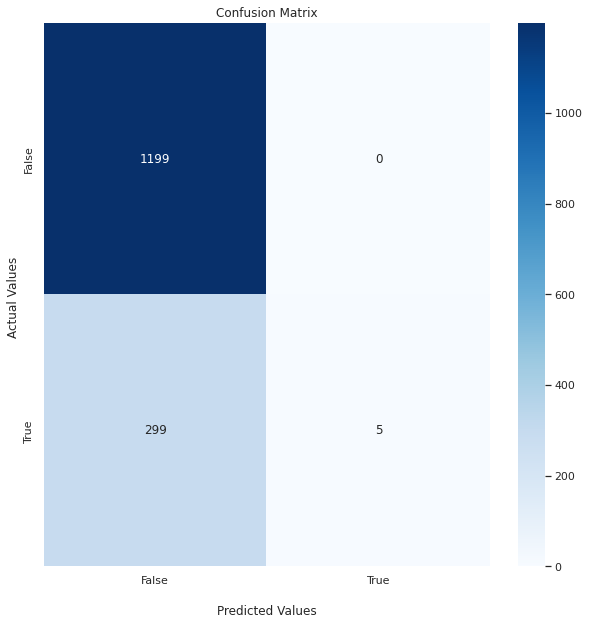

In [ ]:
from pandas.io.formats import style
from sklearn.metrics import classification_report, confusion_matrix
sns.set(rc={"figure.figsize":(10, 10)},)
confusion_matrixc=confusion_matrix(y_test,preds)
ax=sns.heatmap(confusion_matrixc,cmap='Blues',annot=True,fmt='.0f')

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

In [ ]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, preds)
recall

0.01644736842105263

[0]	validation_0-auc:0.576266	validation_1-auc:0.565602
[1]	validation_0-auc:0.592084	validation_1-auc:0.578735
[2]	validation_0-auc:0.592366	validation_1-auc:0.579248
[3]	validation_0-auc:0.626348	validation_1-auc:0.608367
[4]	validation_0-auc:0.626348	validation_1-auc:0.608367
[5]	validation_0-auc:0.628133	validation_1-auc:0.609741
[6]	validation_0-auc:0.646479	validation_1-auc:0.629215
[7]	validation_0-auc:0.64667	validation_1-auc:0.629621
[8]	validation_0-auc:0.654815	validation_1-auc:0.635676
[9]	validation_0-auc:0.656739	validation_1-auc:0.640187
[10]	validation_0-auc:0.655427	validation_1-auc:0.637903
[11]	validation_0-auc:0.6554	validation_1-auc:0.637362
[12]	validation_0-auc:0.663205	validation_1-auc:0.642384
[13]	validation_0-auc:0.668396	validation_1-auc:0.646464
[14]	validation_0-auc:0.667113	validation_1-auc:0.646373
[15]	validation_0-auc:0.667813	validation_1-auc:0.646554
[16]	validation_0-auc:0.667178	validation_1-auc:0.647037
[17]	validation_0-auc:0.670641	validation_1-

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

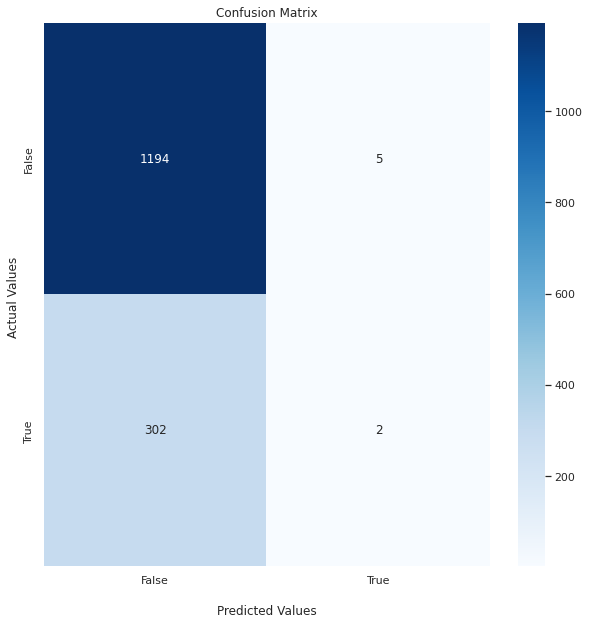

In [ ]:
from xgboost.callback import early_stop
xgbc2=xgb.XGBClassifier(learning_rate=0.1,n_estimators=100,objective='binary:logistic',sample=0.5, max_depth=2,gamma=2, eta=0.8,reg_alpha=0.5,  reg_lambda=0.5)
xgbc2.fit(X_train, y_train ,eval_set=[(X_train, y_train), (X_test, y_test)],eval_metric='auc')
preds = xgbc2.predict(X_test)
sns.set(rc={"figure.figsize":(10, 10)},)
confusion_matrixc=confusion_matrix(y_test,preds)
ax=sns.heatmap(confusion_matrixc,cmap='Blues',annot=True,fmt='.0f')

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

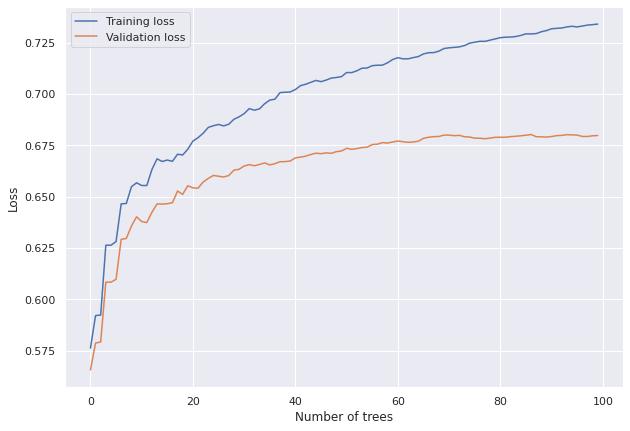

In [ ]:
results = xgbc2.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["auc"], label="Training loss")
plt.plot(results["validation_1"]["auc"], label="Validation loss")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()


#Classification with Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ABClassifier= AdaBoostClassifier(learning_rate=1,n_estimators=40)

In [ ]:
ABClassifier.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=40)

In [ ]:
pred_Ada = ABClassifier.predict(X_test)

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

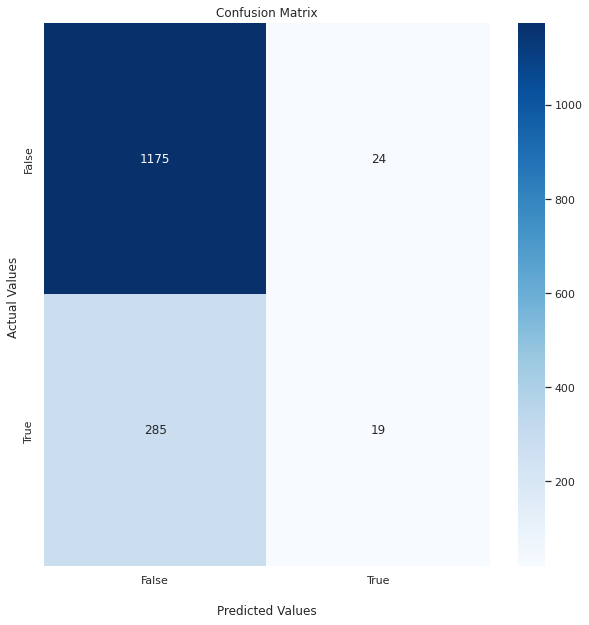

In [ ]:
sns.set(rc={"figure.figsize":(10, 10)},)
confusion_matrixAda=confusion_matrix(y_test,pred_Ada)
ax=sns.heatmap(confusion_matrixAda,cmap='Blues',annot=True,fmt='.0f')

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

#Classification with LR

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression( solver='liblinear', multi_class='ovr', penalty='l1',   C=0.1)
LR.fit(X_train, y_train)

predLR=LR.predict(X_test)

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

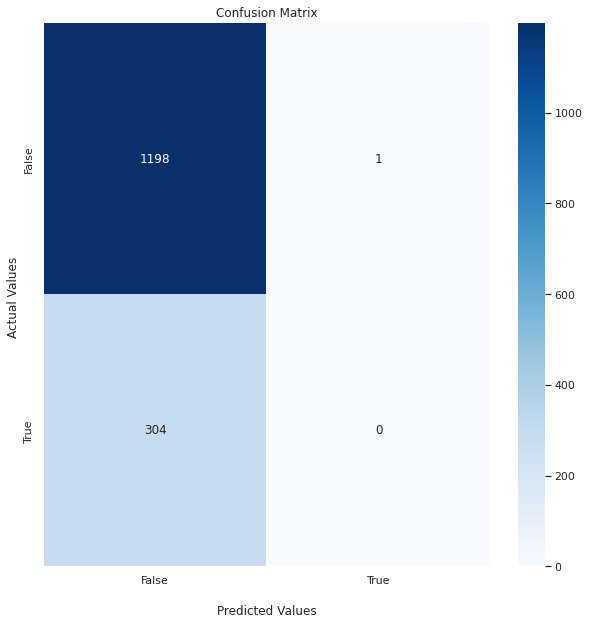

In [ ]:
confusion_matrixLR=confusion_matrix(y_test,predLR)
ax=sns.heatmap(confusion_matrixLR,cmap='Blues',annot=True,fmt='.0f')

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  # This is added back by InteractiveShellApp.init_path()


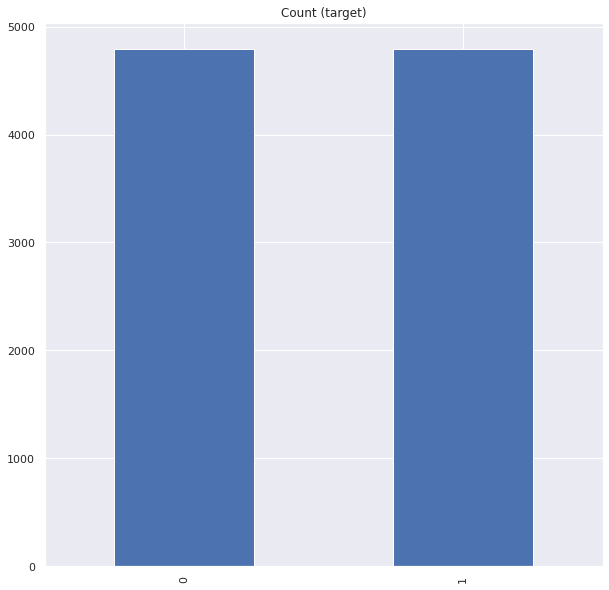

In [ ]:
from imblearn.over_sampling import SMOTE

labels=encoded_df.columns.drop(['ДЕФОЛТ60','x0','x1','clusters'])
target=encoded_df['ДЕФОЛТ60']

smote = SMOTE(sampling_strategy='minority', n_jobs=-1)

X_sm, y_sm = smote.fit_resample(X, y)

synthetic_df = pd.DataFrame(X_sm, columns=labels)
synthetic_df['ДЕФОЛТ60'] = y_sm

synthetic_df['ДЕФОЛТ60'].value_counts().plot(kind='bar', title='Count (target)');



In [ ]:
synthetic_df

,ВОЗРАСТ,ПОЛ,ЗАГРАН,ДОХОД_СЕМЬИ_,ДОХОД_НА_ОДНОГО_ЧЛЕНА_СЕМЬИ,ПЕРСОНАЛЬНЫЙ_ДОХОД,СУММА_ВЫДАННОГО_КРЕДИТА,ЗАПРОШЕННАЯ_СУММА,ДОХОД_СУПРУГИ(А),КРЕДИТЫ_ПОГАШЕНЫ,ПЕРВЫЙ_КРЕДИТ,БРАК_1,БРАК_2,БРАК_3,БРАК_4,ДЕТИ_0,ДЕТИ_1,ДЕТИ_2,ДЕТИ_3,ДЕТИ_4,ИЖДИВЕНЦЫ_0,ИЖДИВЕНЦЫ_1,ИЖДИВЕНЦЫ_2,ИЖДИВЕНЦЫ_3,ИЖДИВЕНЦЫ_4,ОБРАЗОВАНИЕ_1,ОБРАЗОВАНИЕ_2,ОБРАЗОВАНИЕ_3,ОБРАЗОВАНИЕ_4,ИНОСТР.ЯЗЫК_1,ИНОСТР.ЯЗЫК_2,ИНОСТР.ЯЗЫК_3,ИНОСТР.ЯЗЫК_4,АВТО_0,АВТО_1,АВТО_2,АВТО_3,ОТРАСЛЬ_1,ОТРАСЛЬ_2,ОТРАСЛЬ_3,ОТРАСЛЬ_4,ОТРАСЛЬ_5,ОТРАСЛЬ_6,ОТРАСЛЬ_7,ОТРАСЛЬ_8,ОТРАСЛЬ_9,ОТРАСЛЬ_10,ОТРАСЛЬ_11,ОТРАСЛЬ_12,ОТРАСЛЬ_13,ОТРАСЛЬ_14,ОТРАСЛЬ_15,ОТРАСЛЬ_16,ОТРАСЛЬ_17,ОТРАСЛЬ_18,ОТРАСЛЬ_19,ОТРАСЛЬ_20,ОТРАСЛЬ_21,ОТРАСЛЬ_22,ОТРАСЛЬ_23,ОТРАСЛЬ_24,ОТРАСЛЬ_25,ОТРАСЛЬ_26,ОТРАСЛЬ_27,ОТРАСЛЬ_28,ОТРАСЛЬ_29,ОТРАСЛЬ_30,ОТРАСЛЬ_31,ОТРАСЛЬ_32,ОТРАСЛЬ_33,ОТРАСЛЬ_34,ОТРАСЛЬ_35,ОТРАСЛЬ_36,ОТРАСЛЬ_37,ОТРАСЛЬ_38,ОТРАСЛЬ_39,ОТРАСЛЬ_40,ОТРАСЛЬ_41,ОТРАСЛЬ_42,РАБОТА_ПО_НАПР_1,РАБОТА_ПО_НАПР_2,РАБОТА_ПО_НАПР_3,РАБОТА_В_ОРГ_1,РАБОТА_В_ОРГ_2,РАБОТА_В_ОРГ_3,ДОЛЖНОСТЬ_1,ДОЛЖНОСТЬ_3,ДОЛЖНОСТЬ_4,ДОЛЖНОСТЬ_5,ДОЛЖНОСТЬ_6,ОТДЕЛЕНИЕ_3,ОТДЕЛЕНИЕ_7,ОТДЕЛЕНИЕ_8,ОТДЕЛЕНИЕ_10,ОТДЕЛЕНИЕ_11,ОТДЕЛЕНИЕ_14,ОТДЕЛЕНИЕ_16,ОТДЕЛЕНИЕ_17,ОТДЕЛЕНИЕ_18,ОТДЕЛЕНИЕ_24,ОТДЕЛЕНИЕ_25,ОТДЕЛЕНИЕ_27,ОТДЕЛЕНИЕ_28,ОТДЕЛЕНИЕ_29,ОТДЕЛЕНИЕ_30,ОТДЕЛЕНИЕ_31,ОТДЕЛЕНИЕ_33,ОТДЕЛЕНИЕ_36,ОТДЕЛЕНИЕ_37,ОТДЕЛЕНИЕ_38,ОТДЕЛЕНИЕ_39,ОТДЕЛЕНИЕ_41,ОТДЕЛЕНИЕ_50,ОТДЕЛЕНИЕ_51,ОТДЕЛЕНИЕ_52,ОТДЕЛЕНИЕ_53,ОТДЕЛЕНИЕ_54,ОТДЕЛЕНИЕ_55,ОТДЕЛЕНИЕ_56,ОТДЕЛЕНИЕ_57,ОТДЕЛЕНИЕ_58,ОТДЕЛЕНИЕ_59,ОТДЕЛЕНИЕ_60,ОТДЕЛЕНИЕ_64,ОТДЕЛЕНИЕ_65,ОТДЕЛЕНИЕ_66,ОТДЕЛЕНИЕ_70,ОТДЕЛЕНИЕ_73,ОТДЕЛЕНИЕ_78,ОТДЕЛЕНИЕ_79,ОТДЕЛЕНИЕ_80,ОТДЕЛЕНИЕ_83,ОТДЕЛЕНИЕ_84,ОТДЕЛЕНИЕ_85,ОТДЕЛЕНИЕ_90,ОТДЕЛЕНИЕ_96,ОТДЕЛЕНИЕ_98,ОТДЕЛЕНИЕ_103,ОТДЕЛЕНИЕ_104,ОТДЕЛЕНИЕ_107,ОТДЕЛЕНИЕ_108,ОТДЕЛЕНИЕ_110,ОТДЕЛЕНИЕ_114,ОТДЕЛЕНИЕ_115,ОТДЕЛЕНИЕ_116,ОТДЕЛЕНИЕ_117,ОТДЕЛЕНИЕ_119,ОТДЕЛЕНИЕ_120,ОТДЕЛЕНИЕ_121,ОТДЕЛЕНИЕ_122,ОТДЕЛЕНИЕ_125,ОТДЕЛЕНИЕ_126,ОТДЕЛЕНИЕ_127,ОТДЕЛЕНИЕ_135,ОТДЕЛЕНИЕ_136,ОТДЕЛЕНИЕ_137,ОТДЕЛЕНИЕ_138,ОТДЕЛЕНИЕ_140,ОТДЕЛЕНИЕ_143,ОТДЕЛЕНИЕ_144,ОТДЕЛЕНИЕ_145,ОТДЕЛЕНИЕ_146,ОТДЕЛЕНИЕ_148,ОТДЕЛЕНИЕ_149,ОТДЕЛЕНИЕ_153,ОТДЕЛЕНИЕ_154,ОТДЕЛЕНИЕ_155,ОТДЕЛЕНИЕ_156,ОТДЕЛЕНИЕ_157,ОТДЕЛЕНИЕ_159,ОТДЕЛЕНИЕ_160,ОТДЕЛЕНИЕ_161,ОТДЕЛЕНИЕ_162,ОТДЕЛЕНИЕ_163,ОТДЕЛЕНИЕ_164,ОТДЕЛЕНИЕ_165,ОТДЕЛЕНИЕ_166,ОТДЕЛЕНИЕ_167,ОТДЕЛЕНИЕ_168,ОТДЕЛЕНИЕ_169,ОТДЕЛЕНИЕ_170,ОТДЕЛЕНИЕ_171,ОТДЕЛЕНИЕ_177,ОТДЕЛЕНИЕ_178,ОТДЕЛЕНИЕ_179,ОТДЕЛЕНИЕ_181,ОТДЕЛЕНИЕ_182,ОТДЕЛЕНИЕ_184,ОТДЕЛЕНИЕ_185,ОТДЕЛЕНИЕ_186,ОТДЕЛЕНИЕ_187,ОТДЕЛЕНИЕ_188,ОТДЕЛЕНИЕ_189,ОТДЕЛЕНИЕ_190,ОТДЕЛЕНИЕ_191,ОТДЕЛЕНИЕ_192,ОТДЕЛЕНИЕ_193,ОТДЕЛЕНИЕ_194,ОТДЕЛЕНИЕ_195,ОТДЕЛЕНИЕ_196,ОТДЕЛЕНИЕ_199,ОТДЕЛЕНИЕ_200,ОТДЕЛЕНИЕ_201,ОТДЕЛЕНИЕ_202,ОТДЕЛЕНИЕ_203,ОТДЕЛЕНИЕ_204,ОТДЕЛЕНИЕ_205,ОТДЕЛЕНИЕ_206,ОТДЕЛЕНИЕ_208,ОТДЕЛЕНИЕ_210,ОТДЕЛЕНИЕ_211,ОТДЕЛЕНИЕ_212,ОТДЕЛЕНИЕ_213,ОТДЕЛЕНИЕ_214,ОТДЕЛЕНИЕ_216,ОТДЕЛЕНИЕ_217,ОТДЕЛЕНИЕ_218,ОТДЕЛЕНИЕ_219,ОТДЕЛЕНИЕ_220,ОТДЕЛЕНИЕ_223,ОТДЕЛЕНИЕ_224,ОТДЕЛЕНИЕ_225,ОТДЕЛЕНИЕ_226,ОТДЕЛЕНИЕ_227,ОТДЕЛЕНИЕ_228,ОТДЕЛЕНИЕ_229,ОТДЕЛЕНИЕ_230,ОТДЕЛЕНИЕ_231,ОТДЕЛЕНИЕ_232,ОТДЕЛЕНИЕ_240,ОТДЕЛЕНИЕ_241,ОТДЕЛЕНИЕ_243,ОТДЕЛЕНИЕ_247,ОТДЕЛЕНИЕ_248,ОТДЕЛЕНИЕ_249,ОТДЕЛЕНИЕ_257,ГОРОД_1,ГОРОД_2,ГОРОД_3,ГОРОД_4,ГОРОД_5,ГОРОД_6,ГОРОД_7,ГОРОД_8,ГОРОД_9,ГОРОД_10,ГОРОД_11,ГОРОД_12,ГОРОД_13,ГОРОД_14,ГОРОД_15,ГОРОД_16,ГОРОД_17,ГОРОД_18,ГОРОД_19,ГОРОД_20,ГОРОД_21,ГОРОД_22,ГОРОД_23,ГОРОД_24,ГОРОД_27,ГОРОД_29,ГОРОД_30,ГОРОД_31,ГОРОД_32,ГОРОД_33,ГОРОД_35,СОБСТВЕННИК_ФАКТ._0,СОБСТВЕННИК_ФАКТ._1,СОБСТВЕННИК_ФАКТ._2,СОБСТВЕННИК_ФАКТ._3,СОБСТВЕННИК_ФАКТ._4,СОБСТВЕННИК_ФАКТ._5,СОБСТВЕННИК_ФАКТ._6,СМЕНА_МЖ_0,СМЕНА_МЖ_1,СМЕНА_МЖ_2,СМЕНА_МЖ_3,СМЕНА_МЖ_4,ДЕФОЛТ60
0,0.156033,1,0,0.086294,0.214286,0.629630,0.213034,0.578947,0.000000,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
ys=synthetic_df['ДЕФОЛТ60']
Xs=synthetic_df.drop(columns=['ДЕФОЛТ60'])
Xs_train, Xs_test, ys_train, ys_test = train_test_split(
    Xs, ys, stratify=ys)

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

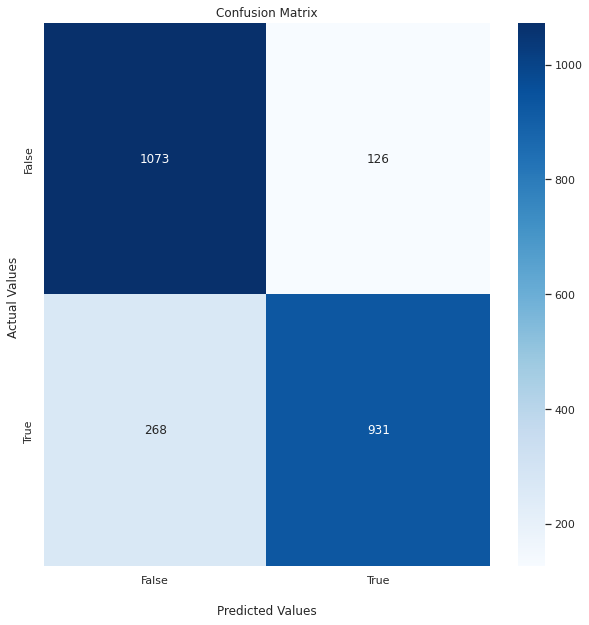

In [ ]:
LRs = LogisticRegression( solver='liblinear', multi_class='ovr', penalty='l1',   C=0.1)
LRs.fit(Xs_train, ys_train)

predLRs=LRs.predict(Xs_test)

confusion_matrixLRs=confusion_matrix(ys_test,predLRs)
ax=sns.heatmap(confusion_matrixLRs,cmap='Blues',annot=True,fmt='.0f')

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

In [ ]:
#proposition- using probabilities from LR output before argmax
predLRs_prob=LRs.predict_proba(Xs_test)

In [ ]:
predLRs_prob

array([[0.58566965, 0.41433035],
       [0.89430082, 0.10569918],
       [0.11747867, 0.88252133],
       ...,
       [0.71316334, 0.28683666],
       [0.40595238, 0.59404762],
       [0.06437856, 0.93562144]])

#LR without synthetic data using grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = {
         'penalty': ['l1', 'l2', 'elasticnet',],
         'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
        }

In [ ]:
grid_search = GridSearchCV(
                estimator=LogisticRegression(
                                            class_weight='balanced',
                                            multi_class='ovr',
                                            max_iter=200
                                            ),
                param_grid=grid,
                scoring='f1',
                refit=True
            )


In [ ]:
X_train

,ВОЗРАСТ,ПОЛ,ЗАГРАН,ДОХОД_СЕМЬИ_,ДОХОД_НА_ОДНОГО_ЧЛЕНА_СЕМЬИ,ПЕРСОНАЛЬНЫЙ_ДОХОД,СУММА_ВЫДАННОГО_КРЕДИТА,ЗАПРОШЕННАЯ_СУММА,ДОХОД_СУПРУГИ(А),КРЕДИТЫ_ПОГАШЕНЫ,ПЕРВЫЙ_КРЕДИТ,БРАК_1,БРАК_2,БРАК_3,БРАК_4,ДЕТИ_0,ДЕТИ_1,ДЕТИ_2,ДЕТИ_3,ДЕТИ_4,ИЖДИВЕНЦЫ_0,ИЖДИВЕНЦЫ_1,ИЖДИВЕНЦЫ_2,ИЖДИВЕНЦЫ_3,ИЖДИВЕНЦЫ_4,ОБРАЗОВАНИЕ_1,ОБРАЗОВАНИЕ_2,ОБРАЗОВАНИЕ_3,ОБРАЗОВАНИЕ_4,ИНОСТР.ЯЗЫК_1,ИНОСТР.ЯЗЫК_2,ИНОСТР.ЯЗЫК_3,ИНОСТР.ЯЗЫК_4,АВТО_0,АВТО_1,АВТО_2,АВТО_3,ОТРАСЛЬ_1,ОТРАСЛЬ_2,ОТРАСЛЬ_3,ОТРАСЛЬ_4,ОТРАСЛЬ_5,ОТРАСЛЬ_6,ОТРАСЛЬ_7,ОТРАСЛЬ_8,ОТРАСЛЬ_9,ОТРАСЛЬ_10,ОТРАСЛЬ_11,ОТРАСЛЬ_12,ОТРАСЛЬ_13,ОТРАСЛЬ_14,ОТРАСЛЬ_15,ОТРАСЛЬ_16,ОТРАСЛЬ_17,ОТРАСЛЬ_18,ОТРАСЛЬ_19,ОТРАСЛЬ_20,ОТРАСЛЬ_21,ОТРАСЛЬ_22,ОТРАСЛЬ_23,ОТРАСЛЬ_24,ОТРАСЛЬ_25,ОТРАСЛЬ_26,ОТРАСЛЬ_27,ОТРАСЛЬ_28,ОТРАСЛЬ_29,ОТРАСЛЬ_30,ОТРАСЛЬ_31,ОТРАСЛЬ_32,ОТРАСЛЬ_33,ОТРАСЛЬ_34,ОТРАСЛЬ_35,ОТРАСЛЬ_36,ОТРАСЛЬ_37,ОТРАСЛЬ_38,ОТРАСЛЬ_39,ОТРАСЛЬ_40,ОТРАСЛЬ_41,ОТРАСЛЬ_42,РАБОТА_ПО_НАПР_1,РАБОТА_ПО_НАПР_2,РАБОТА_ПО_НАПР_3,РАБОТА_В_ОРГ_1,РАБОТА_В_ОРГ_2,РАБОТА_В_ОРГ_3,ДОЛЖНОСТЬ_1,ДОЛЖНОСТЬ_3,ДОЛЖНОСТЬ_4,ДОЛЖНОСТЬ_5,ДОЛЖНОСТЬ_6,ОТДЕЛЕНИЕ_3,ОТДЕЛЕНИЕ_7,ОТДЕЛЕНИЕ_8,ОТДЕЛЕНИЕ_10,ОТДЕЛЕНИЕ_11,ОТДЕЛЕНИЕ_14,ОТДЕЛЕНИЕ_16,ОТДЕЛЕНИЕ_17,ОТДЕЛЕНИЕ_18,ОТДЕЛЕНИЕ_24,ОТДЕЛЕНИЕ_25,ОТДЕЛЕНИЕ_27,ОТДЕЛЕНИЕ_28,ОТДЕЛЕНИЕ_29,ОТДЕЛЕНИЕ_30,ОТДЕЛЕНИЕ_31,ОТДЕЛЕНИЕ_33,ОТДЕЛЕНИЕ_36,ОТДЕЛЕНИЕ_37,ОТДЕЛЕНИЕ_38,ОТДЕЛЕНИЕ_39,ОТДЕЛЕНИЕ_41,ОТДЕЛЕНИЕ_50,ОТДЕЛЕНИЕ_51,ОТДЕЛЕНИЕ_52,ОТДЕЛЕНИЕ_53,ОТДЕЛЕНИЕ_54,ОТДЕЛЕНИЕ_55,ОТДЕЛЕНИЕ_56,ОТДЕЛЕНИЕ_57,ОТДЕЛЕНИЕ_58,ОТДЕЛЕНИЕ_59,ОТДЕЛЕНИЕ_60,ОТДЕЛЕНИЕ_64,ОТДЕЛЕНИЕ_65,ОТДЕЛЕНИЕ_66,ОТДЕЛЕНИЕ_70,ОТДЕЛЕНИЕ_73,ОТДЕЛЕНИЕ_78,ОТДЕЛЕНИЕ_79,ОТДЕЛЕНИЕ_80,ОТДЕЛЕНИЕ_83,ОТДЕЛЕНИЕ_84,ОТДЕЛЕНИЕ_85,ОТДЕЛЕНИЕ_90,ОТДЕЛЕНИЕ_96,ОТДЕЛЕНИЕ_98,ОТДЕЛЕНИЕ_103,ОТДЕЛЕНИЕ_104,ОТДЕЛЕНИЕ_107,ОТДЕЛЕНИЕ_108,ОТДЕЛЕНИЕ_110,ОТДЕЛЕНИЕ_114,ОТДЕЛЕНИЕ_115,ОТДЕЛЕНИЕ_116,ОТДЕЛЕНИЕ_117,ОТДЕЛЕНИЕ_119,ОТДЕЛЕНИЕ_120,ОТДЕЛЕНИЕ_121,ОТДЕЛЕНИЕ_122,ОТДЕЛЕНИЕ_125,ОТДЕЛЕНИЕ_126,ОТДЕЛЕНИЕ_127,ОТДЕЛЕНИЕ_135,ОТДЕЛЕНИЕ_136,ОТДЕЛЕНИЕ_137,ОТДЕЛЕНИЕ_138,ОТДЕЛЕНИЕ_140,ОТДЕЛЕНИЕ_143,ОТДЕЛЕНИЕ_144,ОТДЕЛЕНИЕ_145,ОТДЕЛЕНИЕ_146,ОТДЕЛЕНИЕ_148,ОТДЕЛЕНИЕ_149,ОТДЕЛЕНИЕ_153,ОТДЕЛЕНИЕ_154,ОТДЕЛЕНИЕ_155,ОТДЕЛЕНИЕ_156,ОТДЕЛЕНИЕ_157,ОТДЕЛЕНИЕ_159,ОТДЕЛЕНИЕ_160,ОТДЕЛЕНИЕ_161,ОТДЕЛЕНИЕ_162,ОТДЕЛЕНИЕ_163,ОТДЕЛЕНИЕ_164,ОТДЕЛЕНИЕ_165,ОТДЕЛЕНИЕ_166,ОТДЕЛЕНИЕ_167,ОТДЕЛЕНИЕ_168,ОТДЕЛЕНИЕ_169,ОТДЕЛЕНИЕ_170,ОТДЕЛЕНИЕ_171,ОТДЕЛЕНИЕ_177,ОТДЕЛЕНИЕ_178,ОТДЕЛЕНИЕ_179,ОТДЕЛЕНИЕ_181,ОТДЕЛЕНИЕ_182,ОТДЕЛЕНИЕ_184,ОТДЕЛЕНИЕ_185,ОТДЕЛЕНИЕ_186,ОТДЕЛЕНИЕ_187,ОТДЕЛЕНИЕ_188,ОТДЕЛЕНИЕ_189,ОТДЕЛЕНИЕ_190,ОТДЕЛЕНИЕ_191,ОТДЕЛЕНИЕ_192,ОТДЕЛЕНИЕ_193,ОТДЕЛЕНИЕ_194,ОТДЕЛЕНИЕ_195,ОТДЕЛЕНИЕ_196,ОТДЕЛЕНИЕ_199,ОТДЕЛЕНИЕ_200,ОТДЕЛЕНИЕ_201,ОТДЕЛЕНИЕ_202,ОТДЕЛЕНИЕ_203,ОТДЕЛЕНИЕ_204,ОТДЕЛЕНИЕ_205,ОТДЕЛЕНИЕ_206,ОТДЕЛЕНИЕ_208,ОТДЕЛЕНИЕ_210,ОТДЕЛЕНИЕ_211,ОТДЕЛЕНИЕ_212,ОТДЕЛЕНИЕ_213,ОТДЕЛЕНИЕ_214,ОТДЕЛЕНИЕ_216,ОТДЕЛЕНИЕ_217,ОТДЕЛЕНИЕ_218,ОТДЕЛЕНИЕ_219,ОТДЕЛЕНИЕ_220,ОТДЕЛЕНИЕ_223,ОТДЕЛЕНИЕ_224,ОТДЕЛЕНИЕ_225,ОТДЕЛЕНИЕ_226,ОТДЕЛЕНИЕ_227,ОТДЕЛЕНИЕ_228,ОТДЕЛЕНИЕ_229,ОТДЕЛЕНИЕ_230,ОТДЕЛЕНИЕ_231,ОТДЕЛЕНИЕ_232,ОТДЕЛЕНИЕ_240,ОТДЕЛЕНИЕ_241,ОТДЕЛЕНИЕ_243,ОТДЕЛЕНИЕ_247,ОТДЕЛЕНИЕ_248,ОТДЕЛЕНИЕ_249,ОТДЕЛЕНИЕ_257,ГОРОД_1,ГОРОД_2,ГОРОД_3,ГОРОД_4,ГОРОД_5,ГОРОД_6,ГОРОД_7,ГОРОД_8,ГОРОД_9,ГОРОД_10,ГОРОД_11,ГОРОД_12,ГОРОД_13,ГОРОД_14,ГОРОД_15,ГОРОД_16,ГОРОД_17,ГОРОД_18,ГОРОД_19,ГОРОД_20,ГОРОД_21,ГОРОД_22,ГОРОД_23,ГОРОД_24,ГОРОД_27,ГОРОД_29,ГОРОД_30,ГОРОД_31,ГОРОД_32,ГОРОД_33,ГОРОД_35,СОБСТВЕННИК_ФАКТ._0,СОБСТВЕННИК_ФАКТ._1,СОБСТВЕННИК_ФАКТ._2,СОБСТВЕННИК_ФАКТ._3,СОБСТВЕННИК_ФАКТ._4,СОБСТВЕННИК_ФАКТ._5,СОБСТВЕННИК_ФАКТ._6,СМЕНА_МЖ_0,СМЕНА_МЖ_1,СМЕНА_МЖ_2,СМЕНА_МЖ_3,СМЕНА_МЖ_4
5154,0.110061,2,0,0.101523,0.123215,0.444444,0.174300,0.473684,0.000,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
gs=grid_search.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
gs_pred = gs.predict(X_test)

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

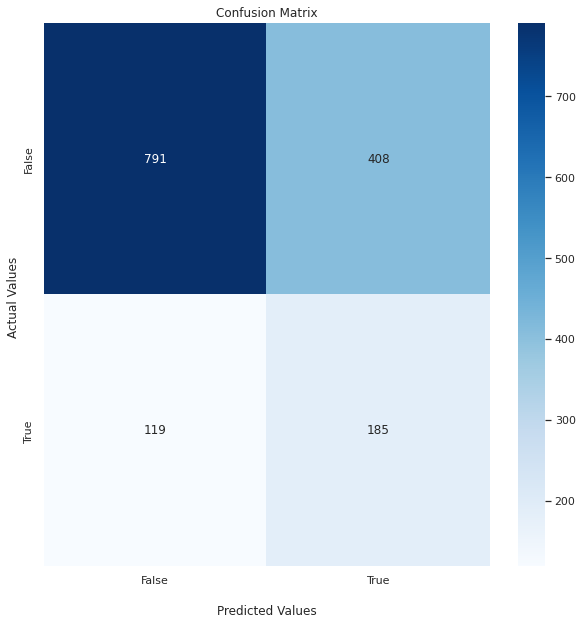

In [ ]:
confusion_matrixG=confusion_matrix(y_test,gs_pred)
ax=sns.heatmap(confusion_matrixG,cmap='Blues',annot=True,fmt='.0f')

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test,gs_pred)
accuracy

0.6493679308050565

In [ ]:
recall=recall_score(y_test,gs_pred)
recall

0.6085526315789473

In [ ]:
from sklearn.metrics import precision_score

precision=precision_score(y_test,gs_pred)
precision

0.31197301854974707

#Prediction on test data

In [ ]:
#Grid search is my main choice
df_test=test.drop(columns=['ДЕФОЛТ60 (Прогноз)','Скоринговый балл'])
id_column = df_test.pop('ИД')
redundant=df_test.pop('ВОЗРАСТ.ЛЕТ')


In [ ]:
#should have written function to not repeat same code
target_columns =['ВОЗРАСТ','ДОХОД_СЕМЬИ_','ДОХОД_НА_ОДНОГО_ЧЛЕНА_СЕМЬИ','ПЕРСОНАЛЬНЫЙ_ДОХОД','СУММА_ВЫДАННОГО_КРЕДИТА','ЗАПРОШЕННАЯ_СУММА','ДОХОД_СУПРУГИ(А)']
tempt = scaler.fit_transform(df_test[target_columns])
scaledt_df = pd.DataFrame(tempt, columns=target_columns)

for i in target_columns:
  df_test[i]=scaledt_df[i]
df_test

,ВОЗРАСТ,ПОЛ,СМЕНА_МЖ,ЗАГРАН,БРАК,ДЕТИ,ИЖДИВЕНЦЫ,ОБРАЗОВАНИЕ,ИНОСТР.ЯЗЫК,АВТО,ОТРАСЛЬ,РАБОТА_ПО_НАПР,РАБОТА_В_ОРГ,ДОЛЖНОСТЬ,ДОХОД_СЕМЬИ_,ДОХОД_НА_ОДНОГО_ЧЛЕНА_СЕМЬИ,ПЕРСОНАЛЬНЫЙ_ДОХОД,СУММА_ВЫДАННОГО_КРЕДИТА,ОТДЕЛЕНИЕ,ГОРОД,ЗАПРОШЕННАЯ_СУММА,СОБСТВЕННИК_ФАКТ.,ДОХОД_СУПРУГИ(А),КРЕДИТЫ_ПОГАШЕНЫ,ПЕРВЫЙ_КРЕДИТ
0,0.366580,2,0,0,2,2,2,2,2,0,32,1,1,5,0.058296,0.090000,0.259259,0.230769,73,10,0.103448,5,0.2500,0,0
1,0.354320,2,0,0,1,2,2,2,4,0,25,1,2,5,0.024664,0.045000,0.148148,0.153846,79,12,0.068966,2,0.1000,0,1
2,0.390307,2,0,0,4,2,2,2,3,0,30,3,3,5,0.024664,0.060000,0.444444,0.384615,153,10,0.172414,1,0.0000,1,0
3,0.141281,2,0,0,1,1,1,3,4,0,32,1,1,5,0.062780,0.111600,0.407407,0.230769,115,1,0.103448,5,0.2250,0,1
4,0.603707,2,0,0,3,3,3,2,4,0,14,3,3,5,0.068161,0.068796,0.333333,0.123077,227,27,0.055172,5,0.0000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3033,0.300159,1,0,0,1,2,2,2,4,0,21,3,3,5,0.035874,0.060000,0.444444,1.000000,226,15,0.448276,5,0.0625,0,1
3034,0.055820,2,1,0,1,1,1,3,4,0,7,2,2,5,0.035874,0.079992,0.074074,0.015385,160,15,0.006897,3,0.1625,1,0
3035,0.190971,2,0,0,1,2,2,2,3,0,7,3,3,5,0.020179,0.039000,0.259259,0.769231,182,27,0.344828,3,0.0375,0,1
3036,0.667532,1,0,0,2,1,0,2,4,0,32,1,2,3,0.024664,0.180001,0.444444,1.000000,145,19,0.448276,1,0.0000,0,1


In [ ]:
target_columns =['БРАК','ДЕТИ','ИЖДИВЕНЦЫ','ОБРАЗОВАНИЕ','ИНОСТР.ЯЗЫК','АВТО','ОТРАСЛЬ',
                 'РАБОТА_ПО_НАПР','РАБОТА_В_ОРГ','ДОЛЖНОСТЬ','ОТДЕЛЕНИЕ','ГОРОД','СОБСТВЕННИК_ФАКТ.','СМЕНА_МЖ']

encodedt_df=pd.get_dummies(df_test, columns=target_columns)
df_test=encodedt_df

In [ ]:
#fixing incompatible columns:
#dropping all unseen features, adding missing features filled with 0
df_test=df_test.drop(columns=['ИНОСТР.ЯЗЫК_0','ОТДЕЛЕНИЕ_245','ОТДЕЛЕНИЕ_246','ОТДЕЛЕНИЕ_264','РАБОТА_ПО_НАПР_0'])
df_test['АВТО_1']=0
df_test['АВТО_2']=0
df_test['АВТО_3']=0
df_test['ОТДЕЛЕНИЕ_218']=0
df_test['ОТДЕЛЕНИЕ_85']=0
df_test['СОБСТВЕННИК_ФАКТ._0']=0

In [ ]:
results_class=gs.predict(df_test)
temp_df=pd.DataFrame(results_class)

results_class_prob=gs.predict_proba(df_test)

filtered_list=[]
for i in results_class_prob:
  filtered_list.append("{:.1%}".format(i[1]))
temp_df_prob=pd.DataFrame(filtered_list)

test['ДЕФОЛТ60 (Прогноз)']=temp_df
test['Скоринговый балл']=temp_df_prob

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [ ]:
test

,ИД,ВОЗРАСТ,ВОЗРАСТ.ЛЕТ,ПОЛ,СМЕНА_МЖ,ЗАГРАН,БРАК,ДЕТИ,ИЖДИВЕНЦЫ,ОБРАЗОВАНИЕ,ИНОСТР.ЯЗЫК,АВТО,ОТРАСЛЬ,РАБОТА_ПО_НАПР,РАБОТА_В_ОРГ,ДОЛЖНОСТЬ,ДОХОД_СЕМЬИ_,ДОХОД_НА_ОДНОГО_ЧЛЕНА_СЕМЬИ,ПЕРСОНАЛЬНЫЙ_ДОХОД,СУММА_ВЫДАННОГО_КРЕДИТА,ОТДЕЛЕНИЕ,ГОРОД,ЗАПРОШЕННАЯ_СУММА,СОБСТВЕННИК_ФАКТ.,ДОХОД_СУПРУГИ(А),КРЕДИТЫ_ПОГАШЕНЫ,ПЕРВЫЙ_КРЕДИТ,ДЕФОЛТ60 (Прогноз),Скоринговый балл
0,6047,34.942466,35,2,0,0,2,2,2,2,2,0,32,1,1,5,30000,7500.0,10000,20000,73,10,20000,5,20000,0,0,1,50.1%
1,6048,34.476712,34,2,0,0,1,2,2,2,4,0,25,1,2,5,15000,3750.0,7000,15000,79,12,15000,2,8000,0,1,1,70.8%
2,6049,35.843836,36,2,0,0,4,2,2,2,3,0,30,3,3,5,15000,5000.0,15000,30000,153,10,30000,1,0,1,0,0,37.5%
3,6050,26.383562,26,2,0,0,1,1,1,3,4,0,32,1,1,5,32000,9300.0,14000,20000,115,1,20000,5,18000,0,1,1,70.4%
4,6051,43.950685,44,2,0,0,3,3,3,2,4,0,14,3,3,5,34400,5733.0,12000,13000,227,27,13000,5,0,0,1,1,58.0%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3033,10361,32.419178,32,1,0,0,1,2,2,2,4,0,21,3,3,5,20000,5000.0,15000,70000,226,15,70000,5,5000,0,1,1,81.8%
3034,10362,23.136986,23,2,1,0,1,1,1,3,4,0,7,2,2,5,20000,6666.0,5000,6000,160,15,6000,3,13000,1,0,0,46.3%
3035,10363,28.271233,28,2,0,0,1,2,2,2,3,0,7,3,3,5,13000,3250.0,10000,55000,182,27,55000,3,3000,0,1,1,66.2%
3036,10364,46.375342,46,1,0,0,2,1,0,2,4,0,32,1,2,3,15000,15000.0,15000,70000,145,19,70000,1,0,0,1,1,80.4%


In [ ]:
test.to_csv('results.csv',index=False)

In [ ]:
#synthetik
results_synth=LRs.predict(df_test)
temp_synth_df=pd.DataFrame(results_synth)

results_class_synth_prob=LRs.predict_proba(df_test)

filtered_list=[]
for i in results_class_synth_prob:
  filtered_list.append("{:.1%}".format(i[1]))
temp_df_synth_prob=pd.DataFrame(filtered_list)

test['ДЕФОЛТ60 (Прогноз) synth']=temp_synth_df
test['Скоринговый балл synth']=temp_df_synth_prob

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [ ]:
test.to_csv('results_synth.csv',index=False) #bad model